## Nayan Arora - u3249907

# Parkinsons Disease - Modeling a Binary Classifier for Early Detection


In [128]:
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression #1
from sklearn.naive_bayes import GaussianNB #2
from sklearn.tree import DecisionTreeClassifier #3.1
from xgboost import XGBClassifier #3.2
from sklearn.neighbors import KNeighborsClassifier #4
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import pandas as pd
import numpy as np
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import tree
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")


## Introduction - Dataset Selection and Description

The Parkinson’s [dataset](https://archive.ics.uci.edu/dataset/174/parkinsons) (Little 2008) is chosen for this project. The dataset will be used to study the ideologies of recognizing and analyzing patterns in the data which will be further learned using machine learning algorithms to build an intelligent machine model. This model will then help us make reliable predictions on whether a person is likely to suffer from Parkinson's Disease which may be able to assist in early detection of PD. 

The Parkinson's dataset covers biomedical voice measurements of 31 people with a total of 195 recordings. Among the 31 people, 23 of them suffered from PD. The dataset has over 6 voice recordings per patient mentioned in the first coloumn 'name'. There are a total of 23 columns/attributes in which 22 columns represent different voice measurements of each recording and one column represents the final status, that is, if a patient has PD or not, represented as, 1s and 0s.


**1. Check Dataset using 10 times rule**

Per the 10 times rule, we need to ensure that X number of attributes should have 10X data records to train the ML model. 

Using df.shape we can infer the overall size of the datset we will be using for our classification problem. In this case we get (195, 24). But we will be eliminating 2 attributes 'name' and 'status'. As 'name' is irrelevant to training a ML and 'status' is the predicted label. So we get (195,22)  

We will be using 80% of the data to train the ML model. So, that means 195 * 0.80 = 156. But we have 22 attributes, that means ideally we shoud have atleast 220 data points for training. 

Although on further studying the dataset, we infer that 156 data points should be more than enough to train an accurate model for detecting PD as the data has a very high quality. 
There is no noise or missing values in the data. 

Also, due to constraints of this project, it is not possible to collect more data. We will be building the model with what is available to us. The model built in this project can be used for future work. If and when a larger dataset is available a more generalised solution can be built using this project as a prelimanary.

But a solution for the scope of this project is to generate synthetic data for the minority class. That is to generate random samples using existing data. This will be done using the idelogies of class augmentation which is implemented using SMOTE (Synethetic Minority Oversampling Technique). It will be explained further in this report. 
 
**2. Explanation for Features used and Pre-Processing needs**

Using df.head we can infer and visualize the names of data distributions of all the attributes we will be using. Description below (Little 2008): 
 - name - ASCII subject name and recording number
 - MDVP:Fo(Hz) - Average vocal frequency
 - MDVP:Fhi(Hz) - Maximum vocal frequency
 - MDVP:Flo(Hz) - Minimum vocal frequency
 - MDVP:Jitter(%) - Measure of variation in frequency
 - MDVP:Jitter(Abs) - Measure of variation in frequency 
 - MDVP:RAP - Measure of variation in frequency
 - MDVP:PPQ - Measure of variation in frequency 
 - Jitter:DDP - Measure of variation in frequency 
 - MDVP:Shimmer - Measures of variation in amplitude
 - MDVP:Shimmer(dB) - Measures of variation in amplitude
 - Shimmer:APQ3 - Measures of variation in amplitude
 - Shimmer:APQ5 - Measures of variation in amplitude
 - MDVP:APQ - Measures of variation in amplitude
 - Shimmer:DDA - Measures of variation in amplitude
 - NHR and HNR - Two measures of ratio of noise to tonal components in the voice
 - status - Health status of the subject (1) - Parkinson's, (0) - healthy
 - RPDE and D2 - Two nonlinear dynamical complexity measures
 - DFA - Signal fractal scaling exponent
 - spread1, spread2, and PPE - Three nonlinear measures of fundamental frequency variation 

The attribute 'name' and the attribute 'status' will not be used in training our ML model. The attritbute 'status' will be regarded as an output or predicted attribite and 'name' of the patient is irrelevant to building our ML model. All of the other explained features are necessary data points for each recording. All the other 22 features described are corelated and provide necessary important insights which will help find patterns in the data and thus will be used for training. 

We will also need to pre-precess our data because the attributes in the data have variable values in different units - some are percentage, some are absolute values and others are random values. We will be using MinMaxScaler, StandardScaler and LabelEncoder from the sklearn library to pre-process our data. 
MinMaxScaler: We will scale the values for all attributes to stay in the range of (-1,1)
StandardScaler: We will use this technique to scale and standardize all features to have a mean 0 and a standard deviation of 1. 
LabelEncoder: This is applied specifically to the 'status' attribute. It is not currently necessary but in case more data is added in the future where the 'status' attribute is not encoded to 0s and 1s. Then, label encoder can help convert the categorical data (yes,no) into numerical form (0,1). 




In [2]:
df = read_csv('/Users/nayanarora/Desktop/PRML/assignment2/partA_stage2/parkinsons/parkinsons.data')
print(df.shape)


(195, 24)


In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## Descriptive Statistics

Below is the descriptive statistics and Visualisations
 - Data information: returns description of all the attributes and their datatypes.
 - Data missing info: returns the sum of all missing information in the dataset. We get 0 for this.
 - Shape: as mentioned earlier, (195,24)
 - Describe: we then describe the data to understand the mean, std and min, max values to infer and understand how the data is distributed. This step helps us understand the pre-precessing techniques we will should be using. 
 - Status distribution: Last, we get a data distribution of people with (147) and without PD (48). 



In [4]:
# Summarize Data
def get_info_dataframe(dataframe):
    print(f"DATA GENERAL INFO - \n")
    print(dataframe.info(),"\n")
    print(f"\n\nDATA MISSING INFO - \n")
    print(dataframe.isnull().sum(),"\n")
    print(f"\n\nDATA SHAPE INFO - \n")
    print(dataframe.shape)
    print(f"\n\nDESCRIBING DATA - \n")
    print(dataframe.describe())
    print(f"\n\nDATA CALSS DISTRIBUTIONS - \n")
    print(dataframe.groupby('status').size())
get_info_dataframe(df)

DATA GENERAL INFO - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 

 ## Data Analyses
 Next we use data visualizations to further understand the dataset and its composition. 
 
 Feature Importance: we plot a box plot for all attributes. Then we plot a box plot for all df attributes against the status attribute. This gives us a deeper insight into feature distribution its importance in increasing variability to produce a more generalised classification model. 

 Distribution of Target Variable: We know that out of 195 data points, we have 147 data points for people who suffer from PD and only 48 data points for those who are healthy. This data distribution is generally not considered to be good for building a generalised solution. Ideally we should have almost equal data points for a binary classification problem to handle all outliers and skewness in the data. 
 

<Figure size 10000x10000 with 0 Axes>

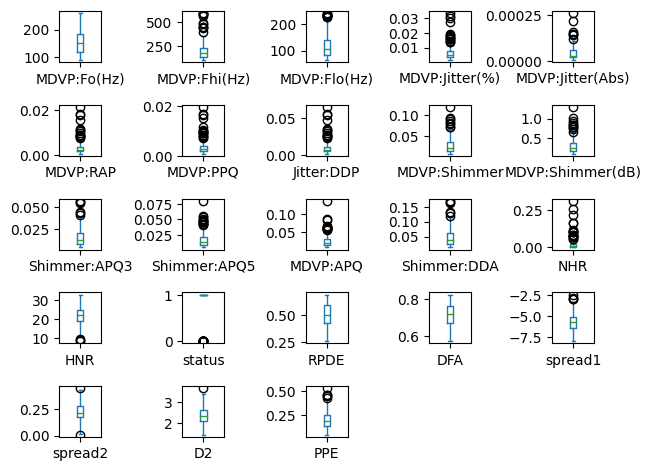

In [5]:
# Data visualizations
# box plots
plt.figure(figsize=(100, 100))
df.plot(kind='box', subplots=True, layout=(5, 5), sharex=False, sharey=False)
plt.tight_layout() 
plt.show()


Below is a plot for spread1, spread2, and PPE which are the three non linear measures for the fundamental frequency variation. It is important to note that there are outliers in all three variations. Hence, Decision tree algorithms will be a good way to go as it is unsual for them to create a leaf to isolate these outliers. Generally speaking, decision trees are able to handle outliers with precision. 

<AxesSubplot: ylabel='PPE'>

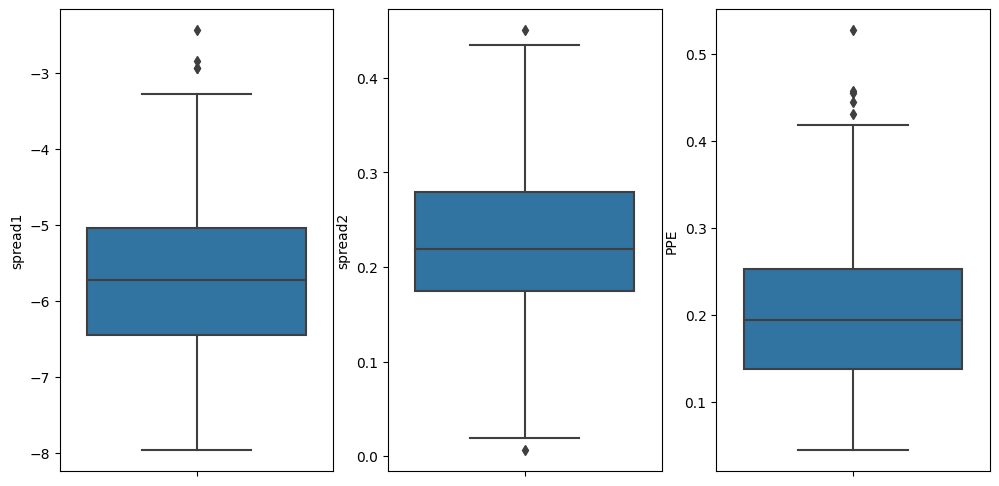

In [6]:
# plt.figure(figsize=(12, 8))
# for feature in (df.drop(columns='name')):
#     sns.boxplot(x= 'status', y=feature, data=df, palette='Set3')
#     plt.title(f'Box Plots of {feature} by Class')
#     plt.show()

fig, ax = plt.subplots(1,3,figsize=(12,6)) 
sns.boxplot(y='spread1',data=df, ax=ax[0]) 
sns.boxplot(y='spread2',data=df, ax=ax[1])
sns.boxplot(y='PPE',data=df,ax=ax[2])

Now, we plot the measures of vocal frequencies MDVP:Flo, MDVP:Fo, and MDVP:Fhi. We notice that the minimum vocal frequency (Flo) has higher values in the range of 75Hz and 125Hz. The average vocal frequency (Fo) is normally distributed in the range 115Hz to 130Hz. The maximum vocal frequency (Fhi) is almost normally distributes except for some extreme values on the right end. 
These curves will be further evaluated uses QQ plots. 

<AxesSubplot: xlabel='MDVP:Fhi(Hz)', ylabel='Density'>

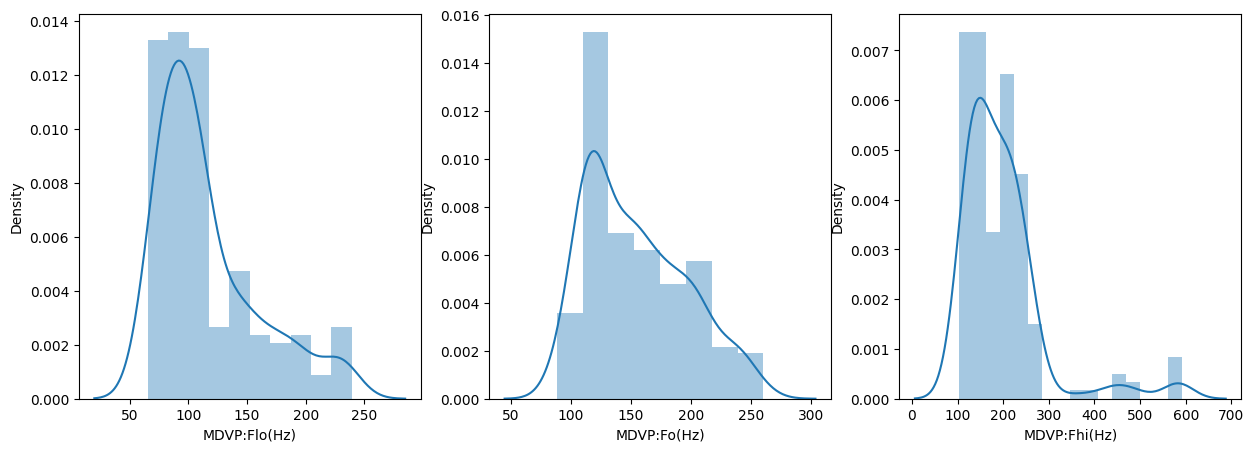

In [7]:
fig, ax = plt.subplots(1,3,figsize=(15,5)) 
sns.distplot(df['MDVP:Flo(Hz)'],ax=ax[0]) 
sns.distplot(df['MDVP:Fo(Hz)'],ax=ax[1]) 
sns.distplot(df['MDVP:Fhi(Hz)'],ax=ax[2])

Now we plot the NHR and HNR which are the two measures of ratio of noise to tonal components in the voice. In the plot below we notice that NHR has a high number of observations in the range 0 and 0.04, which is good as they are all very minimal values for noise. The values for HNR are normally distributed which is what we expect for a good dataset. 


<AxesSubplot: xlabel='HNR', ylabel='Density'>

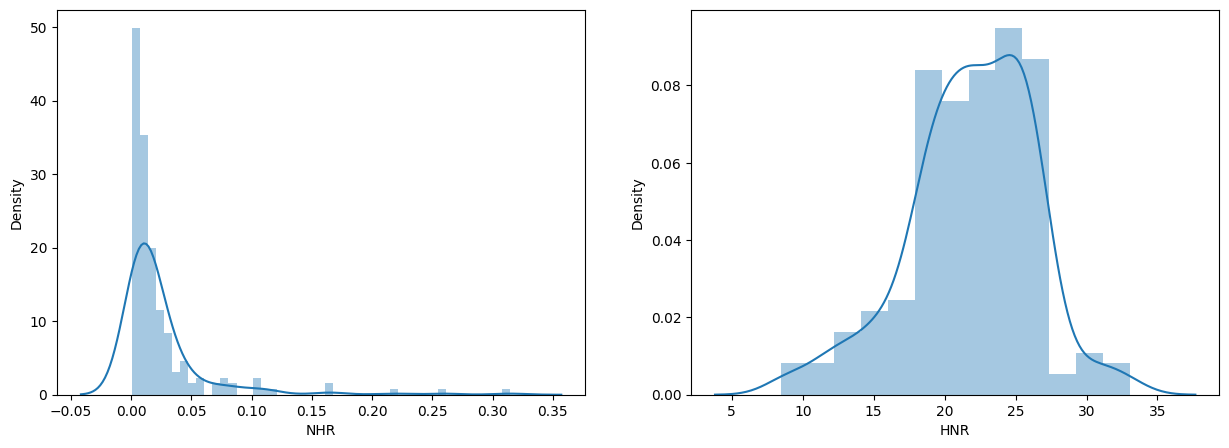

In [8]:
fig, ax = plt.subplots(1,2,figsize=(15,5)) 
sns.distplot(df['NHR'],ax=ax[0]) 
sns.distplot(df['HNR'],ax=ax[1])

## Further Visualizations
We now plot the spread 1 and spread2 to visualize the nonlinear measures of fundamental frequency variation. In the plot below we notice that both spread1 and spread2 have a normal distribution curve. The red lines represents the patients who have PD and the green line is for patients who are normal. Thus, we can observe the range values for spread1 and spread2 when diagnosing patients based on spread. 

<AxesSubplot: xlabel='spread2', ylabel='Density'>

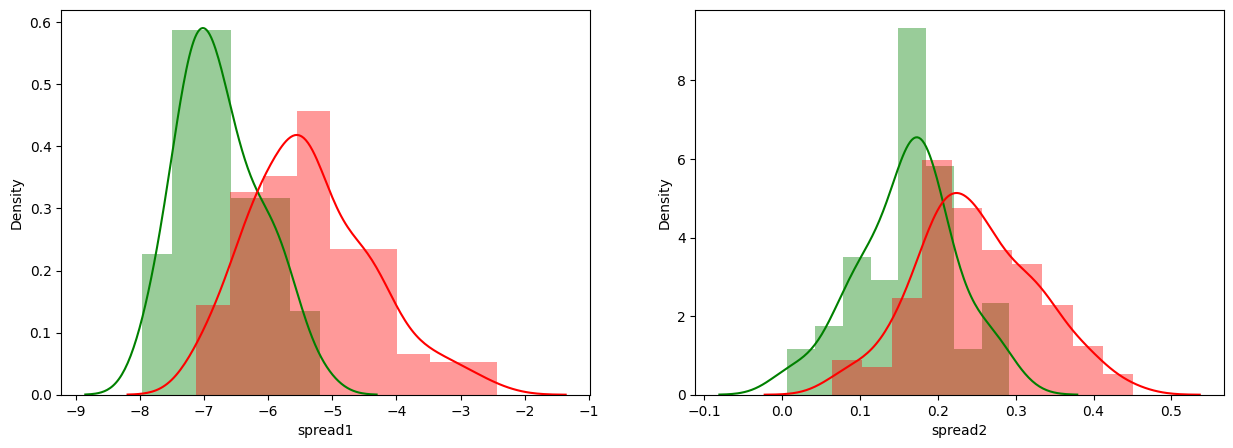

In [9]:
fig, ax = plt.subplots(1,2,figsize=(15,5)) 
sns.distplot( df[df.status == 0]['spread1'], color = 'g', ax=ax[0])
sns.distplot( df[df.status == 1]['spread1'], color = 'r', ax=ax[0])
sns.distplot( df[df.status == 0]['spread2'], color = 'g', ax=ax[1])
sns.distplot( df[df.status == 1]['spread2'], color = 'r', ax=ax[1])

Now we visualize the HNR (harmonics to noise) ratio and NHR (noise to harmonics) ratio for patients with and without PD. Patients with PD have lowe HNR values and higher NHR values when compared to normal Patients. This helps us understand the appropriate or normal levels for such acoustic level classification and determination of PD in patients. 

<AxesSubplot: xlabel='status', ylabel='NHR'>

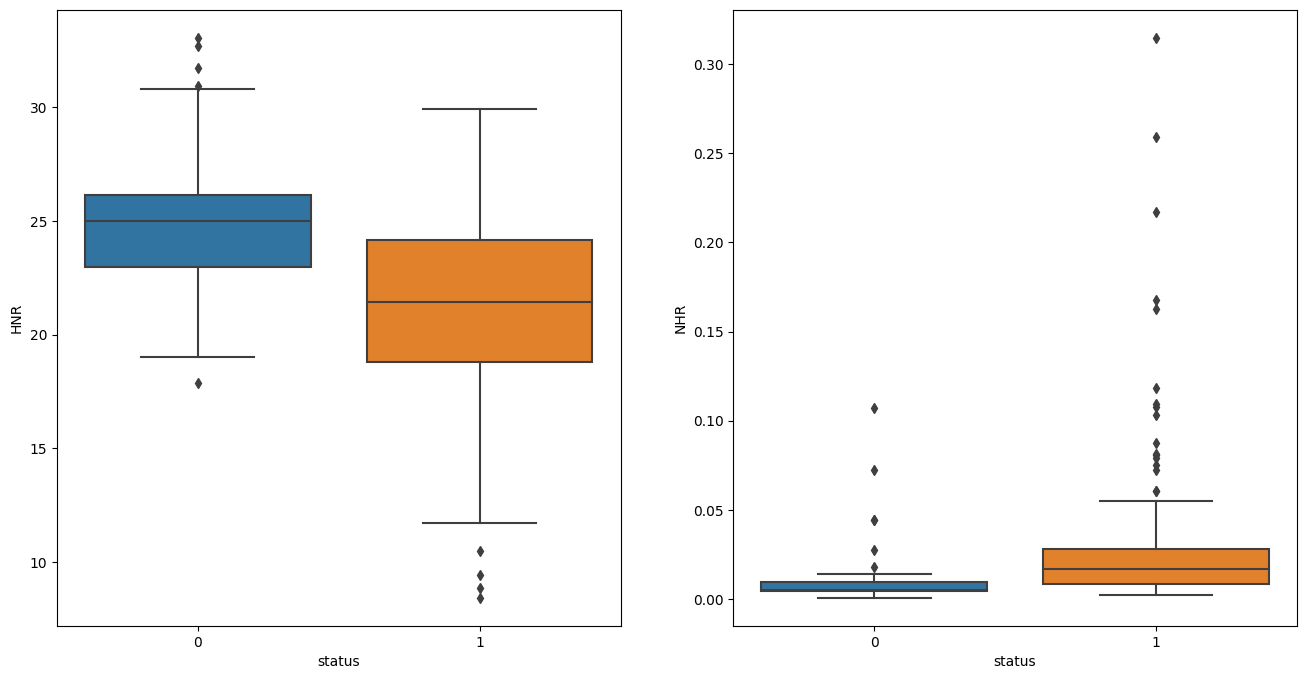

In [10]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
sns.boxplot(x='status',y='HNR',data=df,ax=ax[0])
sns.boxplot(x='status',y='NHR',data=df,ax=ax[1])

By visualizing the Jitter variation is freuency as below, we can visualize and interpret the different values fopr variotion in freuency that can help distinguish between patients with and without PD.

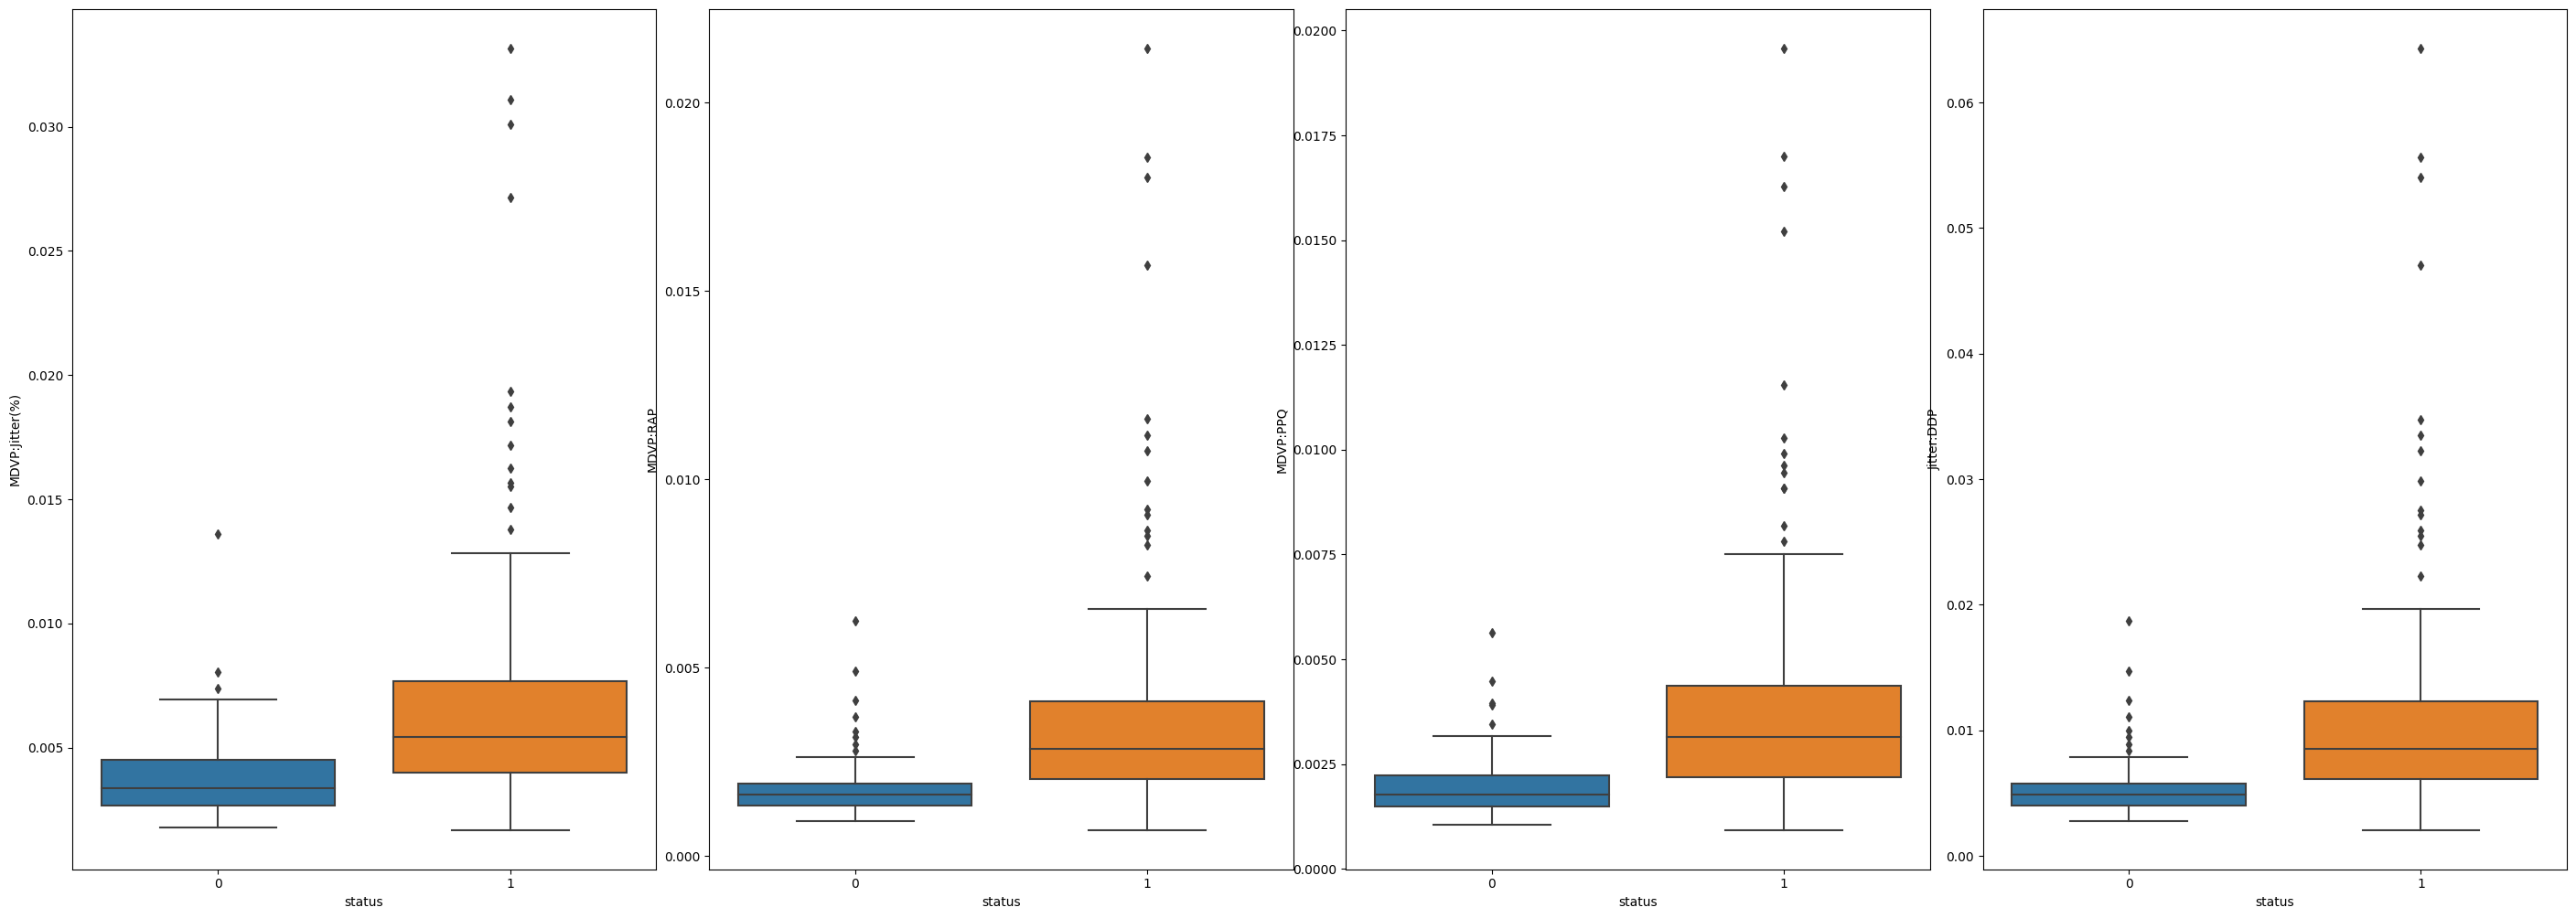

In [11]:

cols = ["MDVP:Jitter(%)","MDVP:RAP","MDVP:PPQ","Jitter:DDP"]
fig, axs = plt.subplots(ncols = 4,figsize=(28,10))
fig.tight_layout()
for i in range(0,len(cols)):
    sns.boxplot(x='status',y=cols[i],data=df, ax = axs[i])

Next we plot the correlation heatmap for all data points in our dataset. We can make multiple observations based on the Correaltion Heatmap below. 
 - As we know that the measure of variation in frequency has multiple attributes (high, low avg, hitter, etc.). Using the plot below we can deduce that they are all highly correlated. 
 - We notice positive correlation between spread1 and status (result).

We can further make more interpreations on a case to case basis which can help understand the depth of each attribute.  

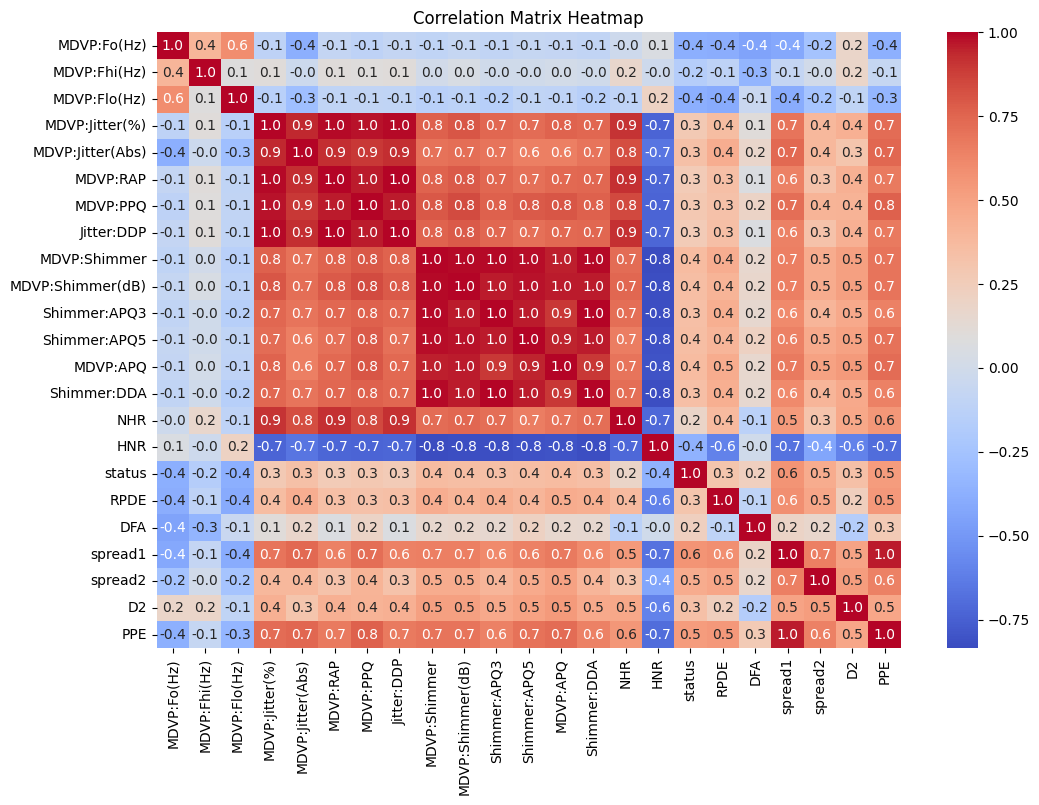

In [12]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Correlation Matrix Heatmap')
plt.show()

All the above visualizations together can provide insights and help narrow down any data attribute that may cause the model to underfit or overfit when training. It also helps analyse which algorithm might be better suited for the binary classification problem.

* Now we plot the QQ Plot, following the feedback recieved. These plots below help us visualize the distribution type of each feature in the dataset against a normal distribution. 

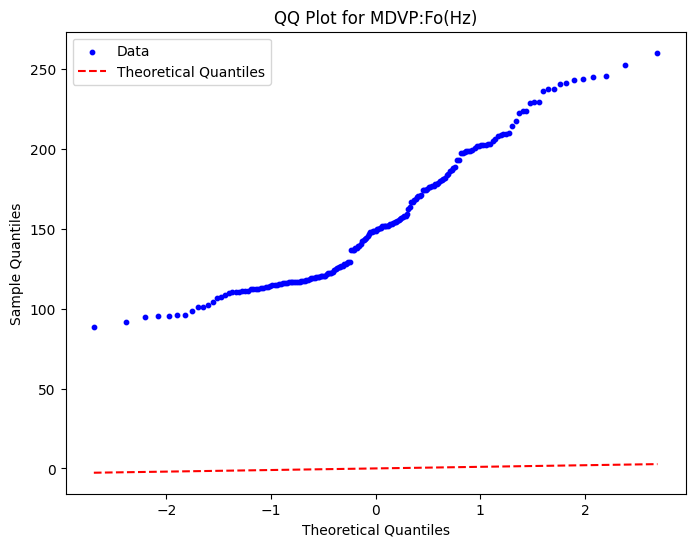

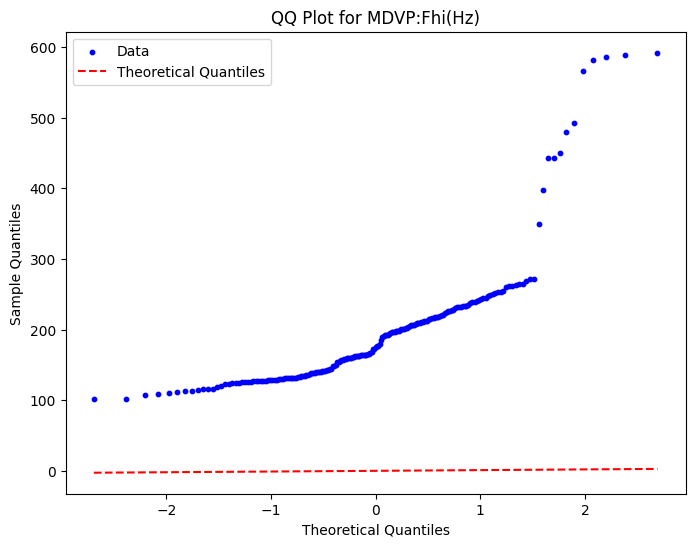

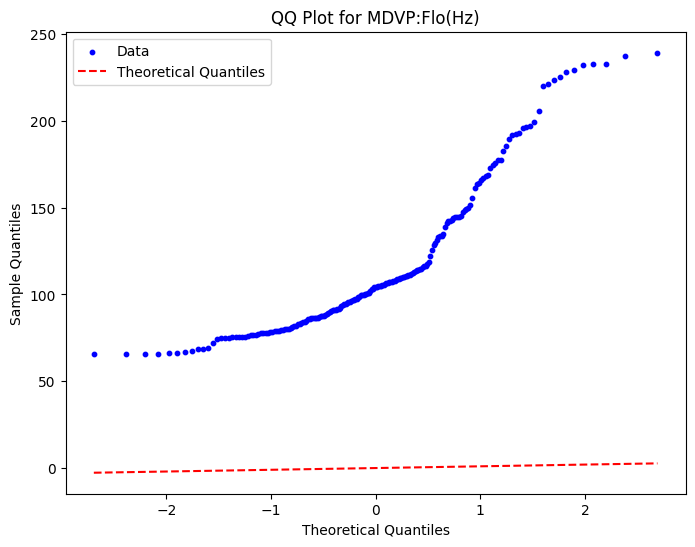

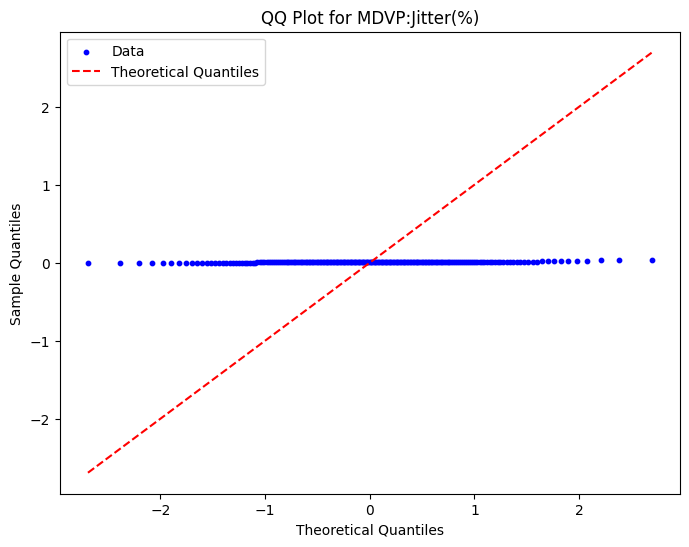

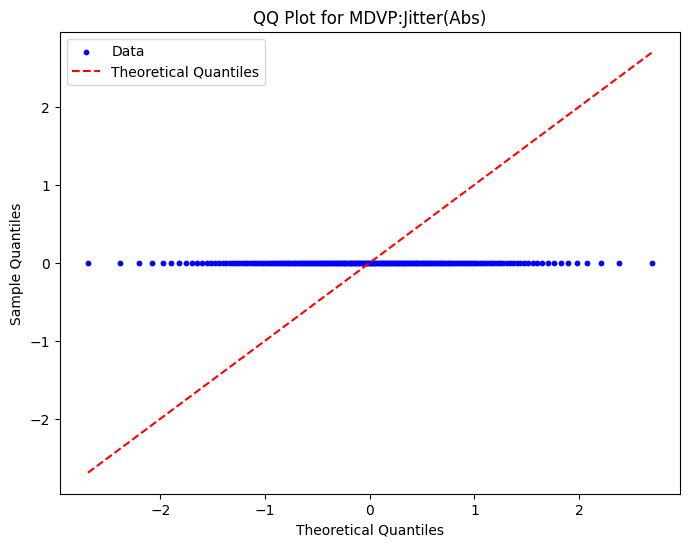

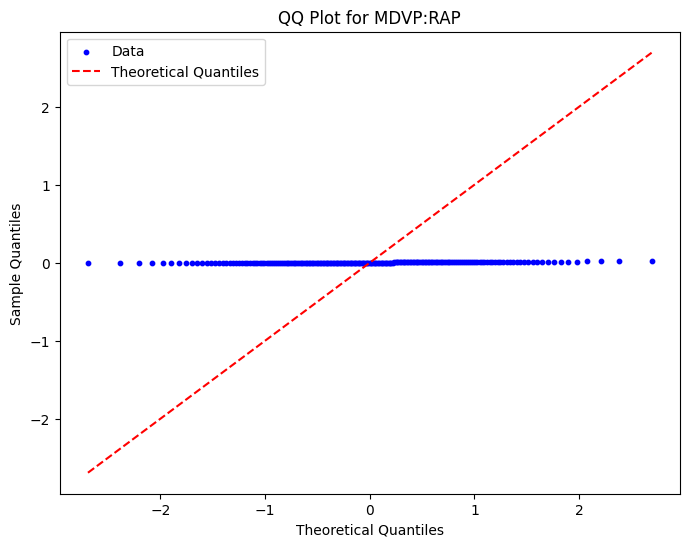

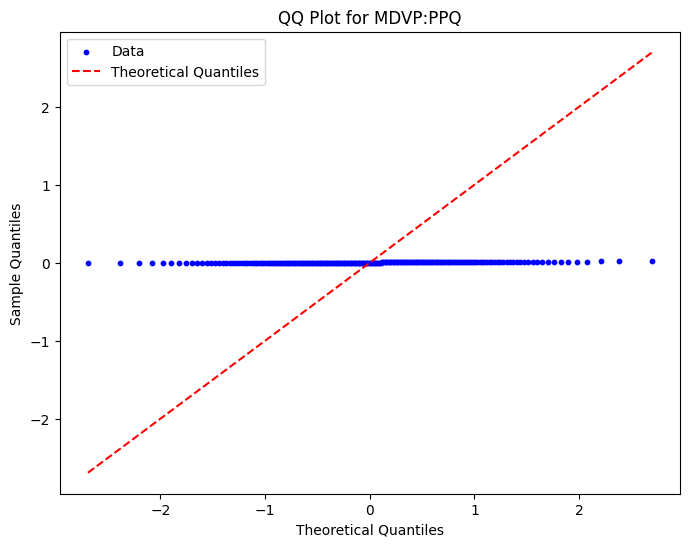

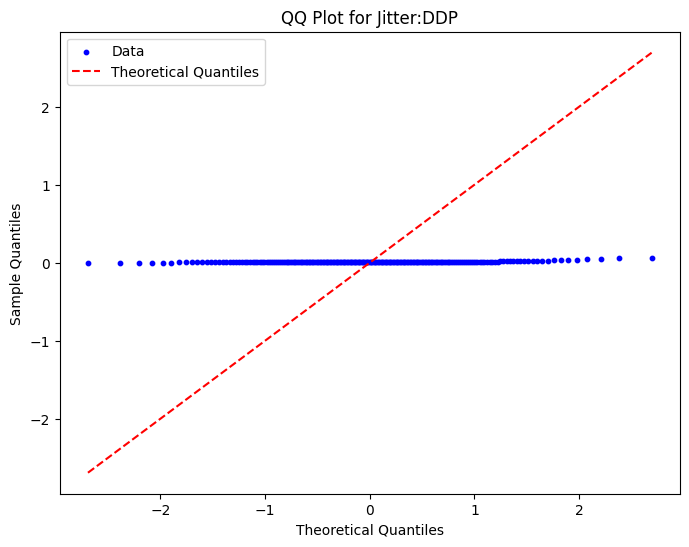

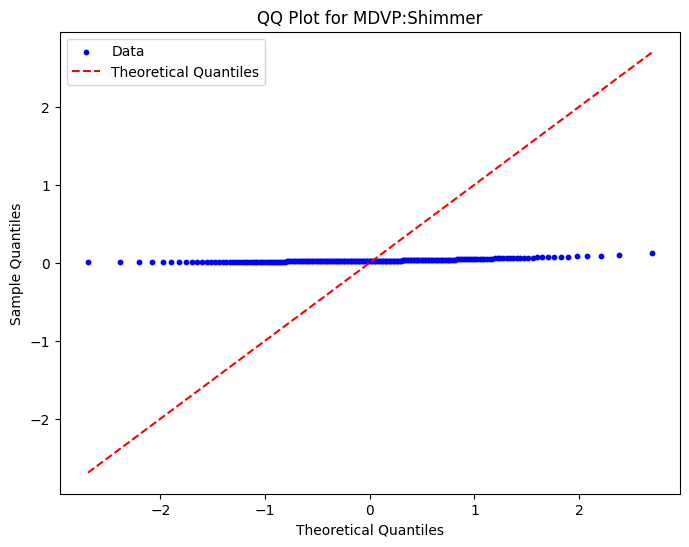

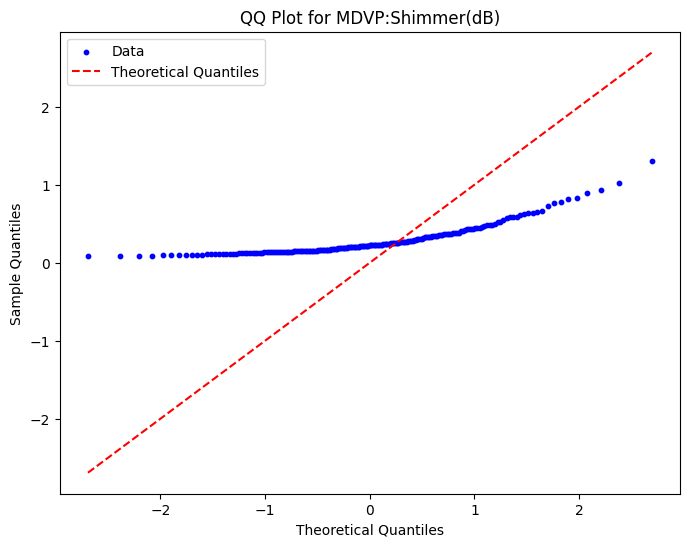

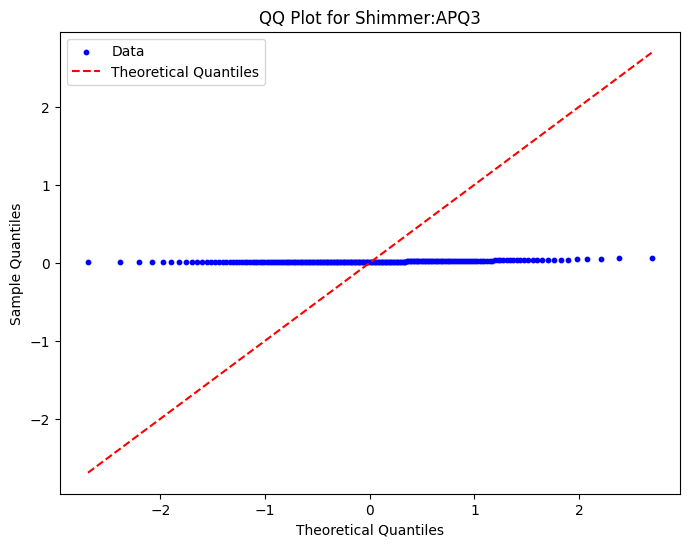

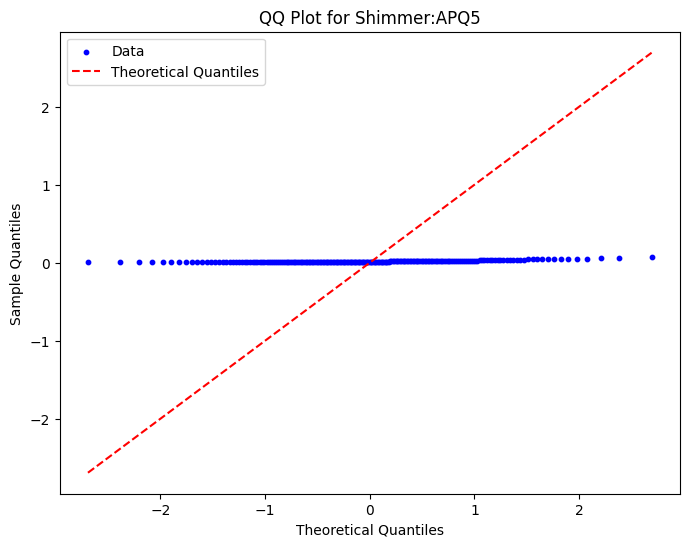

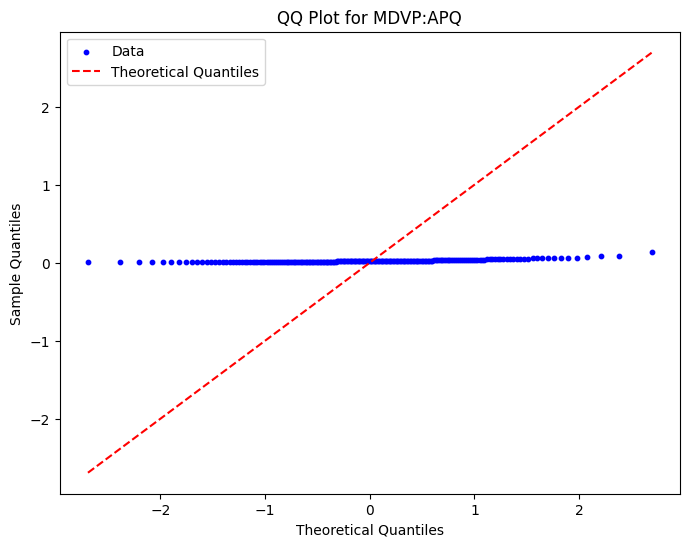

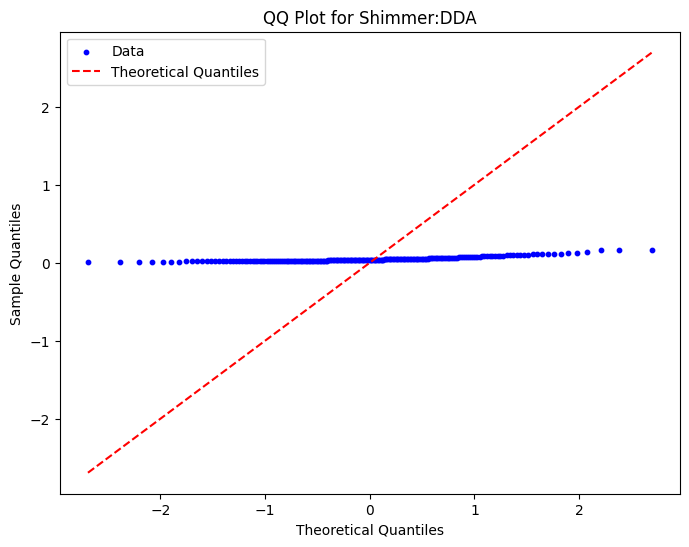

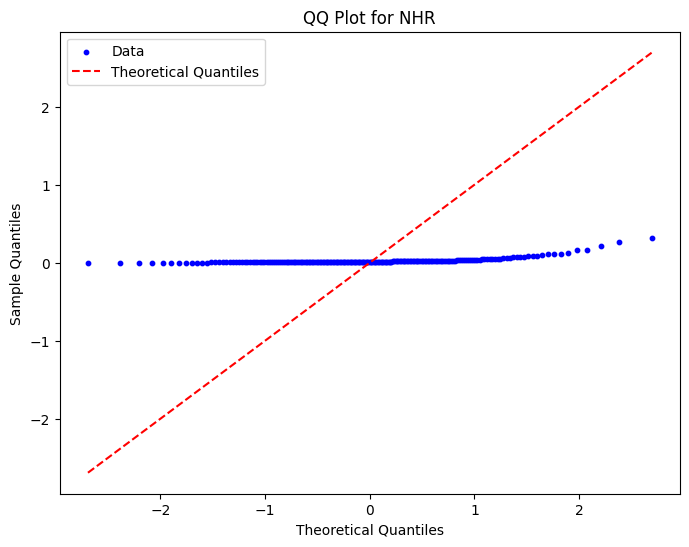

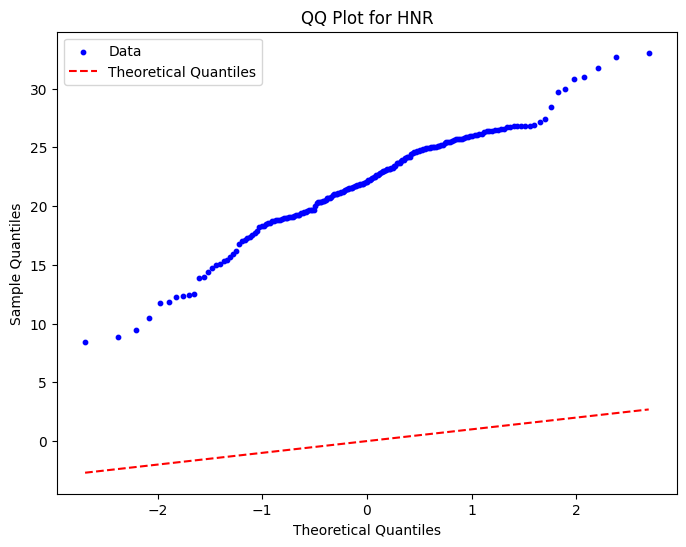

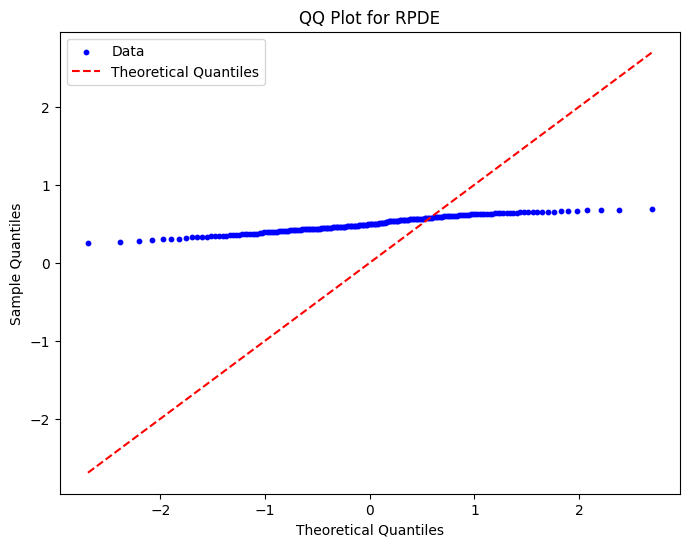

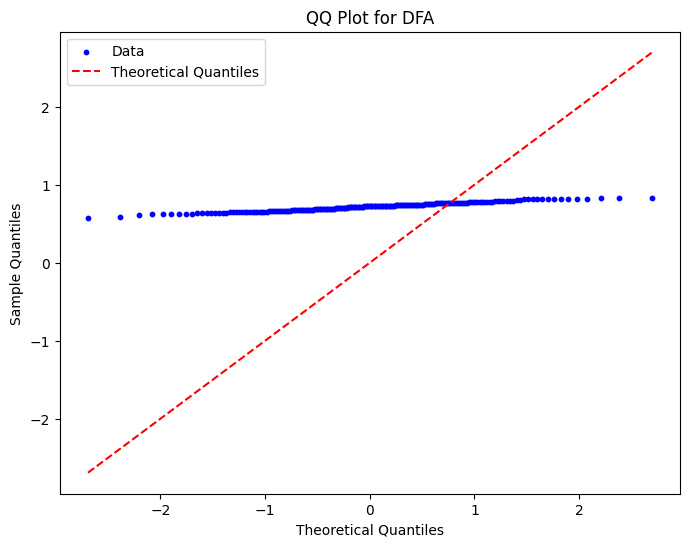

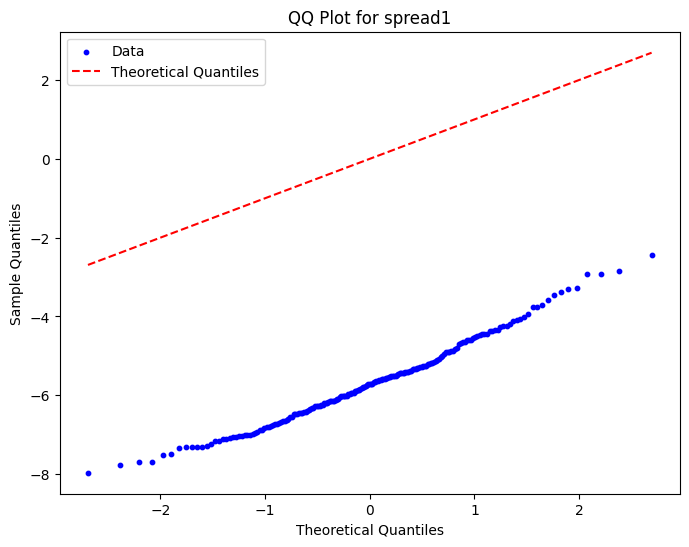

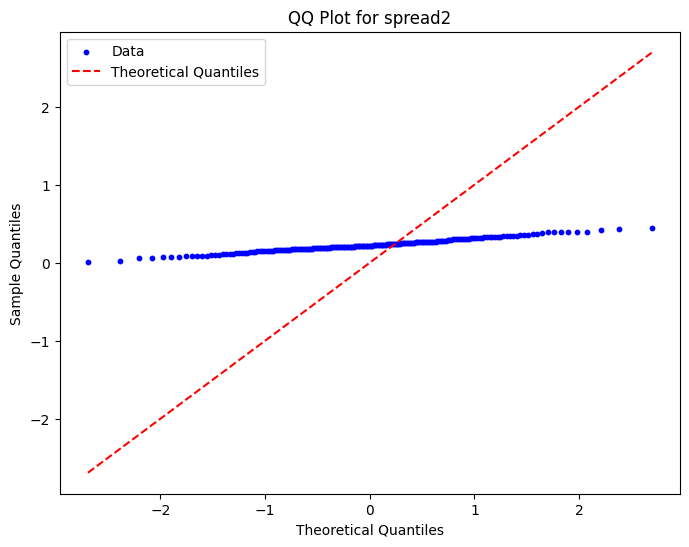

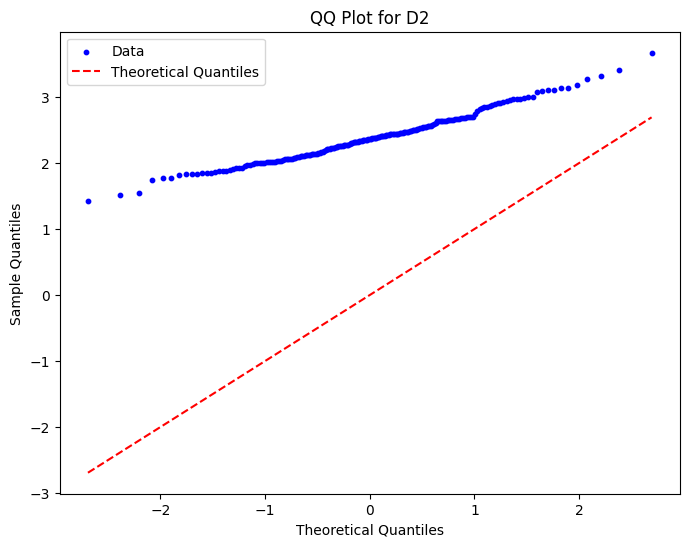

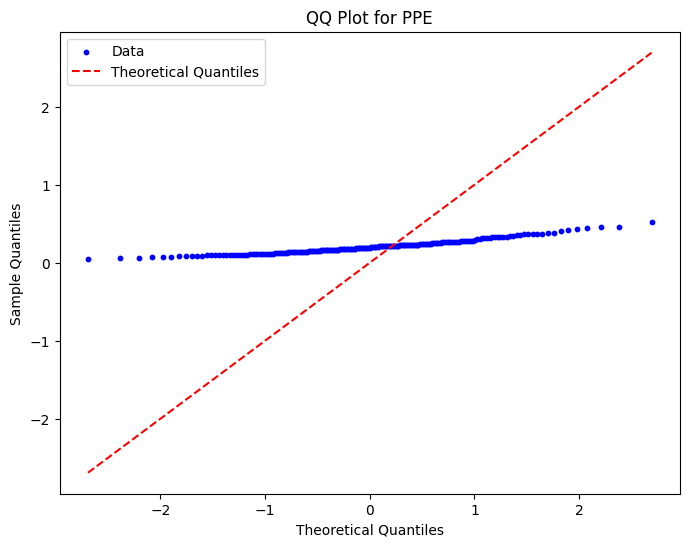

In [13]:
for feature_column in df.columns:
    if feature_column != "status" and feature_column != "name" :  # Exclude the target column if it's present
        data = df[feature_column]

        # Sort the data in ascending order
        sorted_data = np.sort(data)
        
        # Calculate theoretical quantiles assuming a normal distribution
        theoretical_quantiles = stats.probplot(sorted_data, dist="norm", fit=False)

        # Create the QQ plot
        plt.figure(figsize=(8, 6))
        plt.scatter(theoretical_quantiles[0], sorted_data, s=10, c="b", label="Data")
        plt.plot(theoretical_quantiles[0], theoretical_quantiles[0], linestyle="--", color="r", label="Theoretical Quantiles")
        plt.xlabel("Theoretical Quantiles")
        plt.ylabel("Sample Quantiles")
        plt.title(f"QQ Plot for {feature_column}")
        plt.legend()
        plt.show()

All features are acceptable normal distributions except the Minimum, Maximum and Average Vocal Frequencies, which have room for further improvements. We got similar results as previously plotted that confirms that these 3 features have extreme values and we will be using Winzorization to handle these extreme values that may result in outliers in the data. 

## Data Cleaning and Pre-Processing

* Outlier detection and removal using Z-Scores

In [14]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate z-scores for the numeric columns
z_scores = np.abs(stats.zscore(numeric_columns))

# Set the z-score threshold for outlier detection 
z_score_threshold = 3

# Create a mask to identify rows with outliers
outlier_mask = (z_scores < z_score_threshold).all(axis=1)

# Apply the mask to filter out rows with outliers
filtered_df = df[outlier_mask]


* BoxPlot evaluation

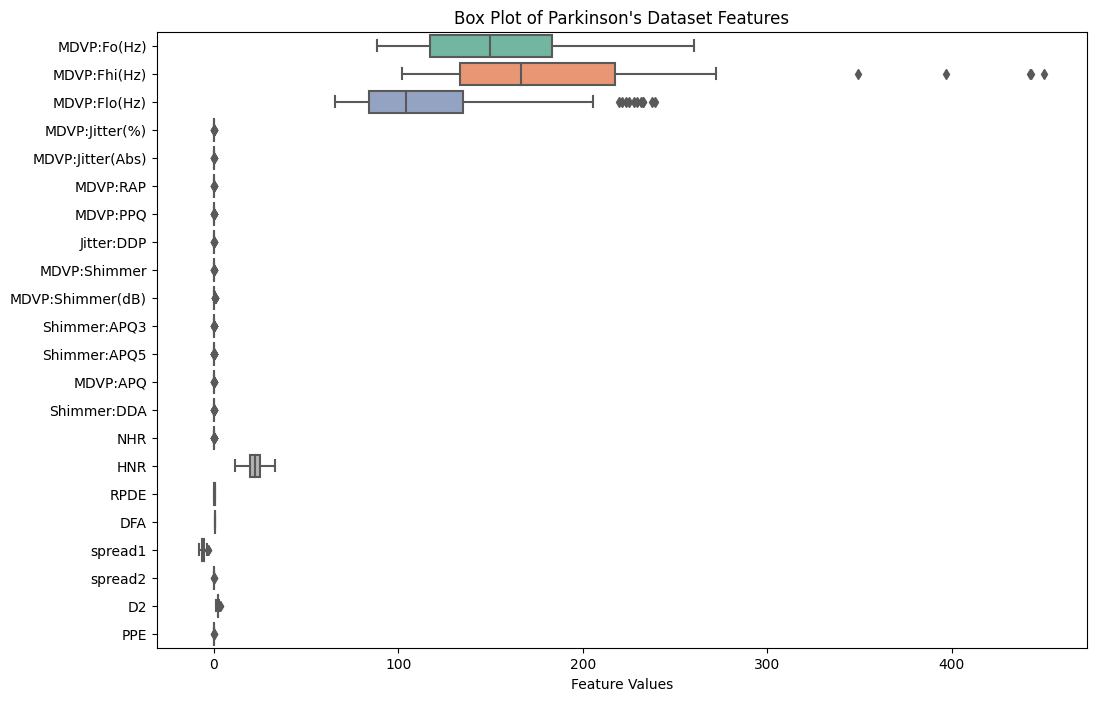

In [15]:
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.boxplot(data=filtered_df.drop(columns=['status','name']), orient='h', palette='Set2')

# Set labels and title
plt.xlabel("Feature Values")
plt.title("Box Plot of Parkinson's Dataset Features")

# Show the plot
plt.show()

We still have some outliers in the min, max and average vocal frequencies that will be handled in the pre-processing stage. 

#### Further Pre-Processing steps

We first separate our 'df' dataset into X and y. Where X will be all the attributes we will use for training our machine learning model. While y is the final target attribute - status (0,1). Where status = 0 is for normal patients and status = 1 is for patients who are suffering from PD. 

We get the final shape of X as 195 rows and 22 columns. And Y as 195 rows. So we know we separated the dataset correctly.

In [16]:
filtered_df.shape

(181, 24)

In [17]:
# split into input and output columns
X = filtered_df.loc[:, ~filtered_df.columns.isin(['status', 'name'])].values[:, 0:]
y = filtered_df.loc[:, 'status'].values
print(X.shape)
print(y.shape)

(181, 22)
(181,)


Next we perform the MinMax Scaler Standardization. It is always a good step to perform this step as scaling the values in a specfic range (in our case 0,1) helps us ensure that all data features/atttributes contribute equally to the model. This step is most useful and can be considered a requirement when we are using algorithm like Logistic Regression or any other gradient descent based algorithms that are sensitive to feature scales. 

In [18]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
y = LabelEncoder().fit_transform(y) # this step is not required as all of the data is already numerical in 0 and 1 format. 
#in case future data is manually added and the 0 and 1 format is not followed then LabelEncoder will handle all such errors. 

Next we perform the standard scaler optmization step. In this step we standardize all the attributes in our dataset by removing the mean and scaling to unit variance. This helps us scale the data to assume a standard normal distribution for all features which helps in reducing the impact of outliers in the data. 

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [20]:
print(X[0]) #check and summarize values after scaling
print(y)

[-0.82846025 -0.43553203 -0.9404442   0.80762037  1.29493844  0.49945686
  1.41995522  0.49749944  1.06178655  1.12053729  0.86342863  1.47566396
  0.60642197  0.86306016  0.19394376 -0.32680904 -0.75978174  1.75187346
  0.97333798  0.55499342 -0.13601028  1.07143457]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]


* using the box cox transformation we estimate the value of lambda and if the evaluated value is close to 1, the transformation is approximately a natural logarithm. Which it is. Out put is for one row but the result was manually checked for all rows

In [21]:
from scipy import stats
offset = 1.0
transformed_data, lambda_value = stats.boxcox(X[0]+offset)
lambda_value

1.0195455274700702

In [22]:
X[0]

array([-0.82846025, -0.43553203, -0.9404442 ,  0.80762037,  1.29493844,
        0.49945686,  1.41995522,  0.49749944,  1.06178655,  1.12053729,
        0.86342863,  1.47566396,  0.60642197,  0.86306016,  0.19394376,
       -0.32680904, -0.75978174,  1.75187346,  0.97333798,  0.55499342,
       -0.13601028,  1.07143457])

In [23]:
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt


lower_limit = 0.05
upper_limit = 0.05

# Apply winsorization to the entire NumPy array
winsorized_data = np.apply_along_axis(lambda x: winsorize(x, limits=(lower_limit, upper_limit)), axis=1, arr=X)

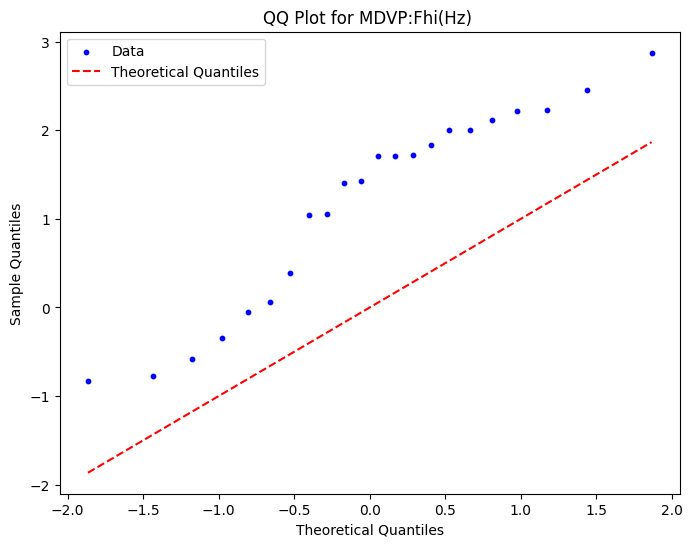

In [24]:
# Calculate the theoretical quantiles assuming a normal distribution
sorted_data = np.sort(X[1])
theoretical_quantiles = stats.probplot(sorted_data, dist="norm", fit=False)
# Create the QQ plot
plt.figure(figsize=(8, 6))
plt.scatter(theoretical_quantiles[0], sorted_data, s=10, c="b", label="Data")
plt.plot(theoretical_quantiles[0], theoretical_quantiles[0], linestyle="--", color="r", label="Theoretical Quantiles")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.title("QQ Plot for MDVP:Fhi(Hz) ")
plt.legend()
plt.show()

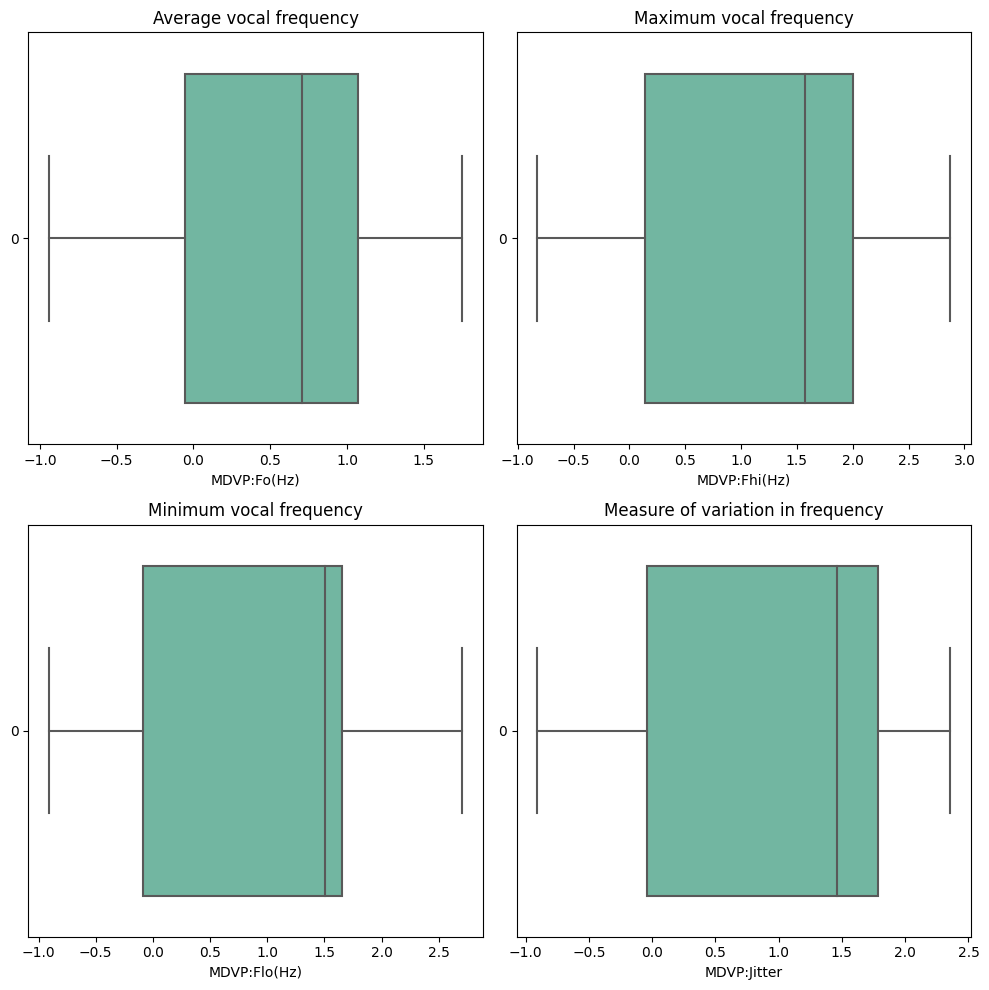

In [25]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(data=X[0], orient='h', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_xlabel("MDVP:Fo(Hz)")
axes[0, 0].set_title("Average vocal frequency")

sns.boxplot(data=X[1], orient='h', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_xlabel("MDVP:Fhi(Hz)")
axes[0, 1].set_title("Maximum vocal frequency")

sns.boxplot(data=X[2], orient='h', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_xlabel("MDVP:Flo(Hz)")
axes[1, 0].set_title("Minimum vocal frequency")

sns.boxplot(data=X[3], orient='h', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_xlabel("MDVP:Jitter")
axes[1, 1].set_title("Measure of variation in frequency")

plt.tight_layout()
plt.show()

* Above QQ plot and Box plots now confirm that we have handled the extreme values as well as outliers in the data. THe data is now normally distributed.

We now perfoem a data split for training and testing purposes. In this case we use a 80-20 split, that is, 80% data for training and 20% data for testing. We perform this using the train_test_split method in the sklearn library. 

In [137]:
my_X = df.loc[:, ~df.columns.isin(['status', 'name'])].values[:, 0:]
my_y = df.loc[:, 'status'].values

In [138]:
testSet_size = 0.20
seed = 42
my_X_train, my_X_test, my_y_train, my_y_test = train_test_split(my_X, my_y, test_size=testSet_size, random_state=seed)

In [26]:
testSet_size = 0.20
seed = 42
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=testSet_size, random_state=seed)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(115, 22)
(115,)
(29, 22)
(29,)
(37, 22)
(37,)


The final pre-processing step we have is class data augmentation. As discussed earlier the dataset does not follow the 10 times rule and to fix that we use the SMOTE method from the imblearn library under sklearn. Smote uses the idelogies of K-nearest neighbour to interpolate between existing minority class samples to produce new synthetic samples. Thus, it helps us fix the class imbalance and balance the overall class distributions that helps us to get a more generalized ML model. 
The transformed training and test set shapes now have 230 rows (samples), thus satisfying the 10 times rule. 

--- Note that sklearn version should be 1.2.2 for smote to run. It gives an error in the 1.3.1 version.

In [27]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_transformed,y_train_transformed = smote.fit_resample(X_train,y_train)

print(X_train_transformed.shape)
print(y_train_transformed.shape)


(170, 22)
(170,)


In [28]:
# Count the number of instances for class 0
class_0_count = len(y_train_transformed[y_train_transformed == 0])

# Count the number of instances for class 1
class_1_count = len(y_train_transformed[y_train_transformed == 1])

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)


Class 0 count: 85
Class 1 count: 85


## Feature Extraction and Selection Process


In [29]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

feature_subset_sizes = range(1, len(X_train_transformed[0]) + 1)

anova_accuracies = []
rfe_accuracies = []

# 10-fold cross-validation
cv = StratifiedKFold(n_splits=10)

for k in feature_subset_sizes:

    anova = SelectKBest(f_classif, k=k)
    X_anova = anova.fit_transform(X_train_transformed, y_train_transformed)

    rfe = RFE(classifier, n_features_to_select=k)
    X_rfe = rfe.fit_transform(X_train_transformed, y_train_transformed)


    anova_scores = cross_val_score(classifier, X_anova, y_train_transformed, cv=cv, scoring='accuracy')
    anova_accuracies.append(anova_scores.mean())

    rfe_scores = cross_val_score(classifier, X_rfe, y_train_transformed, cv=cv, scoring='accuracy')
    rfe_accuracies.append(rfe_scores.mean())

# Find the optimal number of features for ANOVA
optimal_k_anova = feature_subset_sizes[np.argmax(anova_accuracies)]

optimal_anova = SelectKBest(f_classif, k=optimal_k_anova)
X_optimal_anova = optimal_anova.fit_transform(X_train_transformed, y_train_transformed)

classifier.fit(X_optimal_anova, y_train_transformed)
y_pred_anova = classifier.predict(X_optimal_anova)

#RFE
optimal_k_rfe = feature_subset_sizes[np.argmax(rfe_accuracies)]

optimal_rfe = RFE(classifier, n_features_to_select=optimal_k_rfe)
X_optimal_rfe = optimal_rfe.fit_transform(X_train_transformed, y_train_transformed)

classifier.fit(X_optimal_rfe, y_train_transformed)
y_pred_rfe = classifier.predict(X_optimal_rfe)


# Calculate the accuracy on the entire dataset
accuracy_anova = accuracy_score(y_train_transformed, y_pred_anova)
accuracy_rfe = accuracy_score(y_train_transformed, y_pred_rfe)


print(f"Optimal ANOVA Feature Count: {optimal_k_anova}, Accuracy: {accuracy_anova}")
print(f"Optimal RFE Feature Count: {optimal_k_rfe}, Accuracy: {accuracy_rfe}")


Optimal ANOVA Feature Count: 6, Accuracy: 1.0
Optimal RFE Feature Count: 10, Accuracy: 1.0


In [30]:
print(X_optimal_anova.shape)
print(X_optimal_rfe.shape)
print(y_train_transformed.shape)

(170, 6)
(170, 10)
(170,)


In [31]:
print(X_test.shape)
print(y_test.shape)

(37, 22)
(37,)


In [32]:
count_0 = len(y_test[y_test == 0])

# Count the number of instances for class 1
count_1 = len(y_test[y_test == 1])

print("Class 0 count:", count_0)
print("Class 1 count:", count_1)

Class 0 count: 9
Class 1 count: 28


In [33]:
X_test_transformed, y_test_transformed = smote.fit_resample(X_test,y_test)

In [34]:
print(X_test_transformed.shape)
print(y_test_transformed.shape)

(56, 22)
(56,)


In [35]:
count_0 = len(y_test_transformed[y_test_transformed == 0])

# Count the number of instances for class 1
count_1 = len(y_test_transformed[y_test_transformed == 1])

print("Class 0 count:", count_0)
print("Class 1 count:", count_1)

Class 0 count: 28
Class 1 count: 28


In [36]:
X_val_anova = optimal_anova.transform(X_val)
X_val_rfe = optimal_rfe.transform(X_val)
X_test_anova = optimal_anova.transform(X_test)
X_test_rfe = optimal_rfe.transform(X_test)

print(X_val_anova.shape)
print(X_val_rfe.shape)
print(y_val.shape)

print(X_test_anova.shape)
print(X_test_rfe.shape)
print(y_test.shape)

(29, 6)
(29, 10)
(29,)
(37, 6)
(37, 10)
(37,)


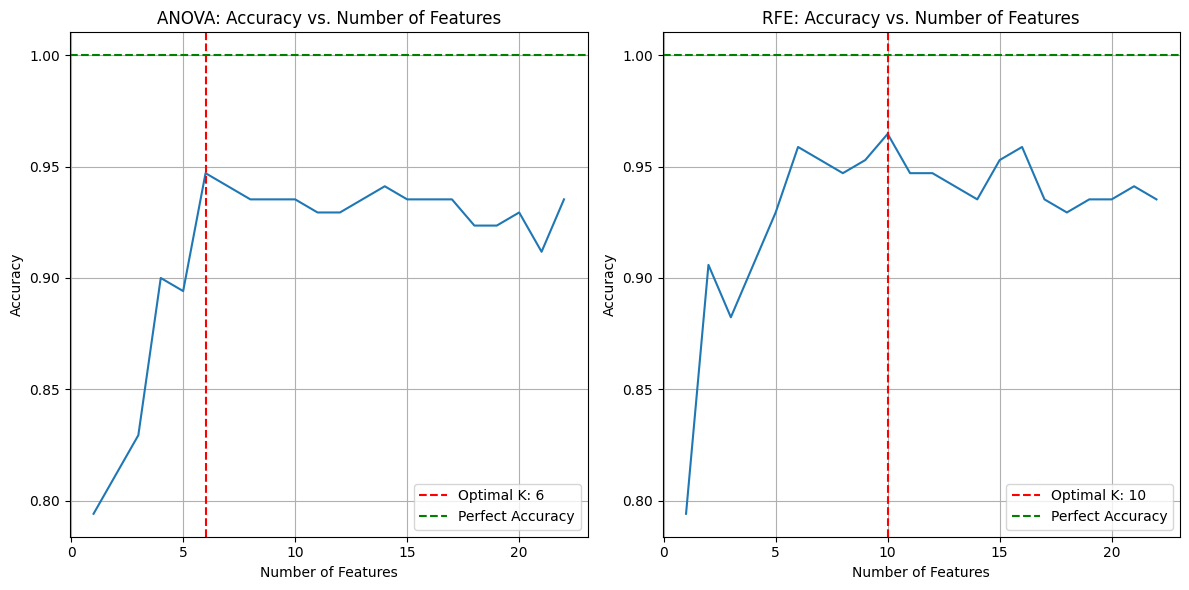

In [37]:
plt.figure(figsize=(12, 6))

# ANOVA Plot
plt.subplot(1, 2, 1)
plt.plot(feature_subset_sizes, anova_accuracies)
plt.axvline(x=optimal_k_anova, color='r', linestyle='--', label=f'Optimal K: {optimal_k_anova}')
plt.axhline(y=1.0, color='g', linestyle='--', label='Perfect Accuracy')
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("ANOVA: Accuracy vs. Number of Features")
plt.legend()
plt.grid(True)

# RFE Plot
plt.subplot(1, 2, 2)
plt.plot(feature_subset_sizes, rfe_accuracies)
plt.axvline(x=optimal_k_rfe, color='r', linestyle='--', label=f'Optimal K: {optimal_k_rfe}')
plt.axhline(y=1.0, color='g', linestyle='--', label='Perfect Accuracy')
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("RFE: Accuracy vs. Number of Features")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Algorithm Selection

We now select 5 algorithms for our supervised binary classification problem. Find below the reasoning for why each of the selected algorithm is being used for this task.

 - Logistic Regression: LR has proven efficient for various classification tasks due to its simplicity, ease of interpretibility, and model transparency. LR is a member of the supervised classification algorithm family. The LR algorithm, by definition, measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function. Therefore, the LR algorithm will perform well on the supervised binary classification problem like the parkinsons classification problem (Saimadhu 2015). 
 
 - Random Forest Classifier: This classifier is an ensemble learning method that combines the predictions of multiple decision trees which helps in achieving an overall improved performance and more generalized models. It is also robus to overfitting. It also averages the predictions of multiple decision trees, thus eliminating any noise in the data (Beheshti 2022). It has also been widely implemented for classification tasks with voice data. 

 - XGBoost Classifier: XGBoost algorithm is a member of the ensemble algorithm family which is used for both classification and prediction. The algorithm creates multiple classifiers that are weak learners and combine them to get better overall performance. The XGBoost is chosen as it is also widely used for supervised classification taks and a different approach will give us different insights. XGBoost Classifier has also been widely implemented for voice classificaition tasks and is known to perform well for such problems (Male or Female voice using XGBoost 2022).
 
 - K-Nearest Neighbour: KNN is effective when local patterns and instance-based learning are critical. It does not make any assumptions about data and minimal training is required. It is also known as the lazy learner but is widely used for supervised classification problems. Hence it is a good choice. It is chosen based on the research (Thiruvengatanadhan 2017). 

Further research was done to finalize the above selected models. There are more options for different algorithms that could have been implemented (for ex, Gradient Boosting and others) but the above selections were made based on my understanding of the algorithm model, flowchart and documentation available for the skelearn libarary. These algortihms will now we tested for the Parkinsons dataset in the next step below.  

## Algorithm Implementation and Reportings

Below we use the updated X_train_transformed and y_train_transformed for building the model accuracy report. 
Based on the initial analyses we have four algorithms - Decision Tree Classifer, XGBoost Classifier, Random forest, and K-Nearest Neighnour that give us a mean accuracy result of 90% and above.

Because we have multiple algorithms that give us accurate results, we will have to further analyse the results to better understand the classifications produced by the algorithms and then make a choice for the most suited result. 
 

In [38]:
# Define a function to plot learning curves
def plot_learning_curves(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, 
                                                           train_sizes=np.linspace(0.1, 1.0, 10), 
                                                           scoring='accuracy')
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(6, 4))
    plt.title("Learning Curves")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")
    
    plt.plot(train_sizes, train_mean, label="Training Accuracy", color="b")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="b")
    
    plt.plot(train_sizes, val_mean, label="Validation Accuracy", color="r")
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="r")
    
    plt.legend(loc="best")
    
    plt.show()

RF: 0.935294 (0.061414)
RF(Validation): 0.90 



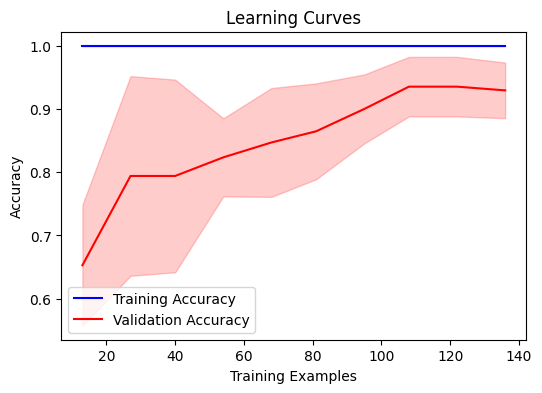

XGB: 0.911765 (0.060276)
XGB(Validation): 0.97 



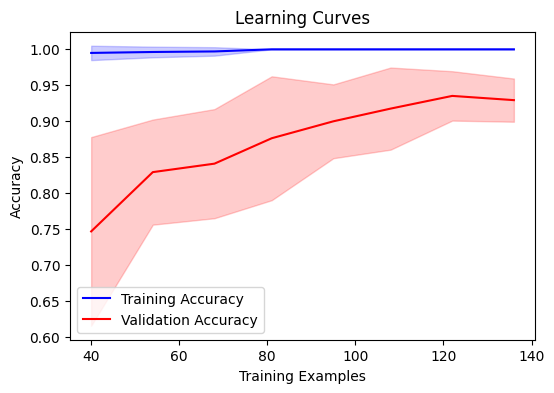

KNN: 0.941176 (0.037203)
KNN(Validation): 0.93 



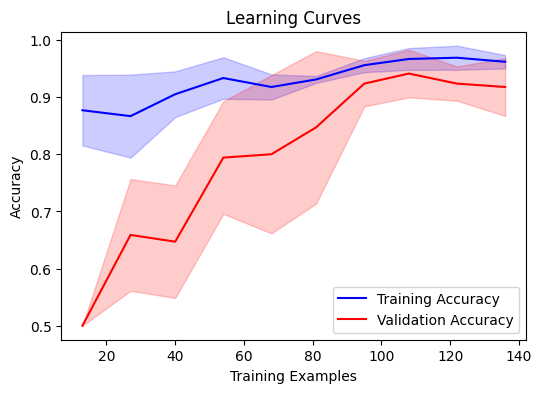

LR: 0.817647 (0.066811)
LR(Validation): 0.86 



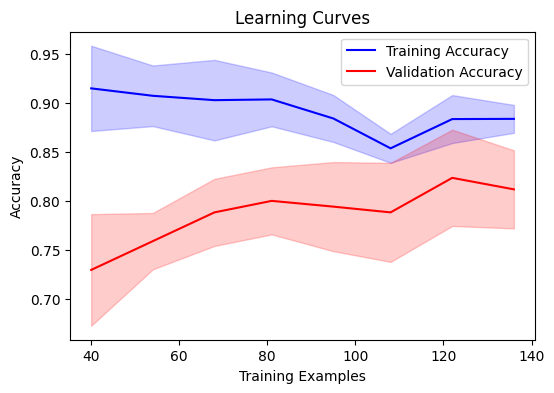



RF shows no significant overfitting.
XGB shows no significant overfitting.
KNN shows no significant overfitting.
LR shows no significant overfitting.


In [39]:
# Spot-Check Algorithms
models = []
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear',multi_class='ovr')))
# evaluate each model in turn
train_results = []
validation_results = []
names = []

for name, model in models:
     kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
     cv_results = cross_val_score(model, X_train_transformed, y_train_transformed, cv=kfold, scoring='accuracy')
     train_results.append(cv_results)
     names.append(name)
     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(msg)
     #evalutaions on the test set will generate a basis for checking if there is any overfitting models
     model.fit(X_train_transformed, y_train_transformed)
     val_acc = model.score(X_val, y_val)
     validation_results.append(val_acc)
     msg = f"{name}(Validation): {val_acc:.2f} \n"
     print(msg)
     plot_learning_curves(model, X_train_transformed, y_train_transformed)
print('\n')
# Compare cross-validation and test accuracies to check for overfitting
for i, name in enumerate(names):
    cv_accuracy = train_results[i].mean()
    val_acc = validation_results[i]
    if cv_accuracy >= val_acc:
        print(f"{name} shows no significant overfitting.")
    elif (cv_accuracy + 0.1) < val_acc :
        print(f"{name} may be overfitting.")
    else:
        print(f"{name} shows no significant overfitting.")

So, now we plot a comparison plot for all the algorithms below. We notice that there is 1 outlier in the XGBoost algorithm but it also has the best overall highest performance, going upto 98%. The top 3 algorithms DTC, XGB and KNN are have realtively high mean accuracies and low average standard deviations which are considered good results. 

But all the prediction results are currently being made on the training dataset, it is important to analyse these results on unseen test dataset. 


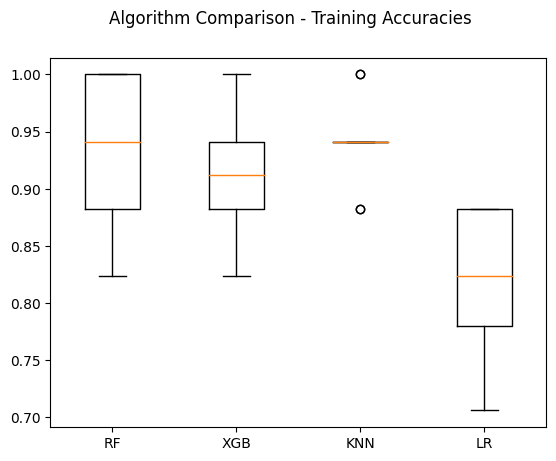

In [40]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison - Training Accuracies')
ax = fig.add_subplot(111)
plt.boxplot(train_results)
ax.set_xticklabels(names)
plt.show()

RF: 0.929412 (0.057635)
RF(Validation): 0.93 



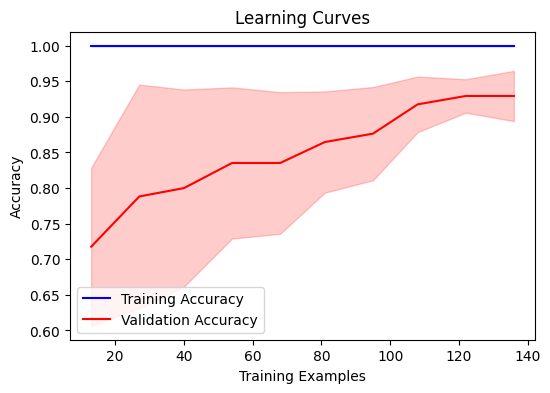

XGB: 0.929412 (0.063355)
XGB(Validation): 0.93 



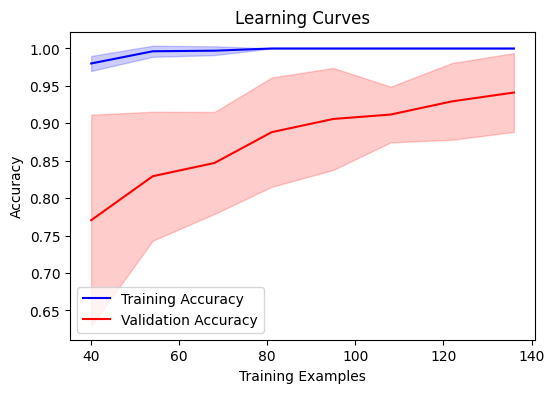

KNN: 0.905882 (0.079792)
KNN(Validation): 0.93 



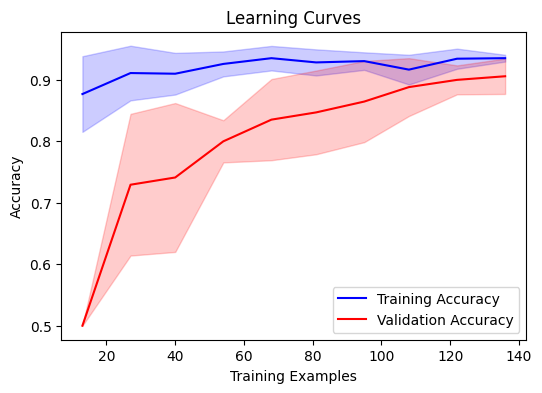

LR: 0.811765 (0.051281)
LR(Validation): 0.83 



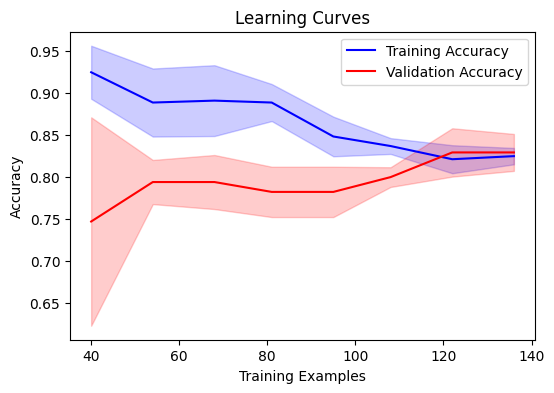



RF shows no significant overfitting.
XGB shows no significant overfitting.
KNN shows no significant overfitting.
LR shows no significant overfitting.


In [41]:
#ANOVA

# evaluate each model in turn
train_results = []
validation_results = []
names = []
for name, model in models:
     kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
     cv_results = cross_val_score(model,X_optimal_anova, y_train_transformed, cv=kfold, scoring='accuracy')
     train_results.append(cv_results)
     names.append(name)
     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(msg)
     #evalutaions on the test set will generate a basis for checking if there is any overfitting models
     model.fit(X_optimal_anova, y_train_transformed)
     val_acc = model.score(X_val_anova, y_val)
     validation_results.append(val_acc)
     msg = f"{name}(Validation): {val_acc:.2f} \n"
     print(msg)
     plot_learning_curves(model, X_optimal_anova, y_train_transformed)

print('\n')
# Compare cross-validation and test accuracies to check for overfitting
for i, name in enumerate(names):
    cv_accuracy = train_results[i].mean()
    val_acc = validation_results[i]
    if cv_accuracy >= val_acc:
        print(f"{name} shows no significant overfitting.")
    elif (cv_accuracy + 0.1) < val_acc :
        print(f"{name} may be overfitting.")
    else:
        print(f"{name} shows no significant overfitting.")

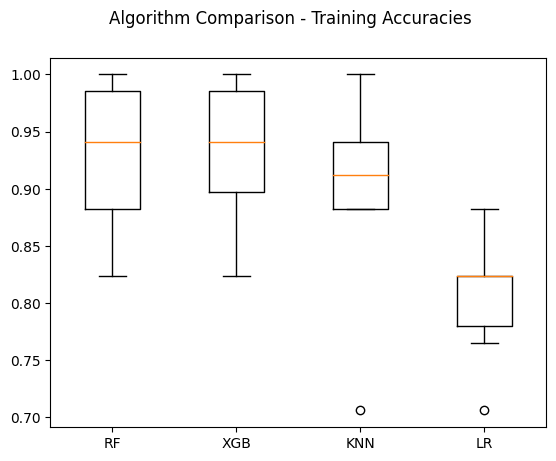

In [42]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison - Training Accuracies')
ax = fig.add_subplot(111)
plt.boxplot(train_results)
ax.set_xticklabels(names)
plt.show()

RF: 0.964706 (0.053913)
RF(Validation): 0.90 



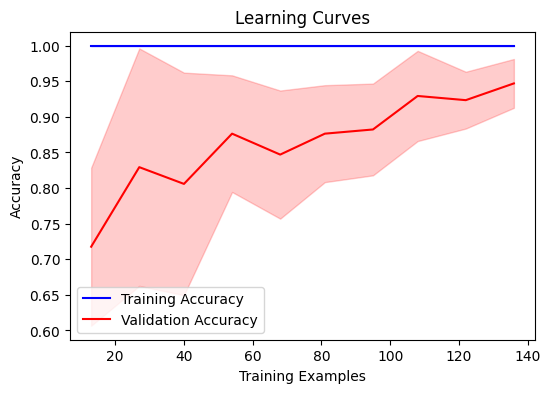

XGB: 0.917647 (0.065503)
XGB(Validation): 0.93 



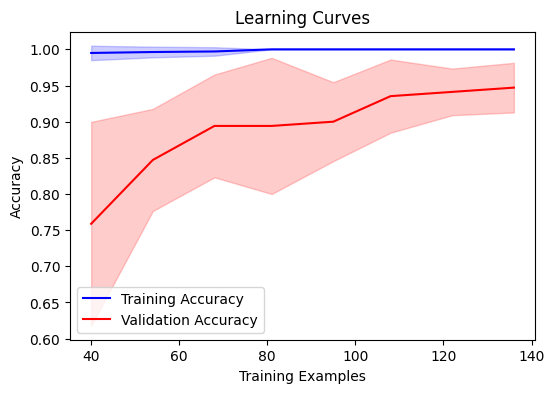

KNN: 0.923529 (0.045943)
KNN(Validation): 0.93 



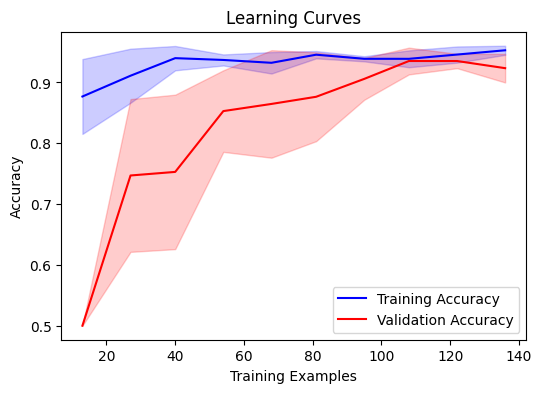

LR: 0.829412 (0.055494)
LR(Validation): 0.83 



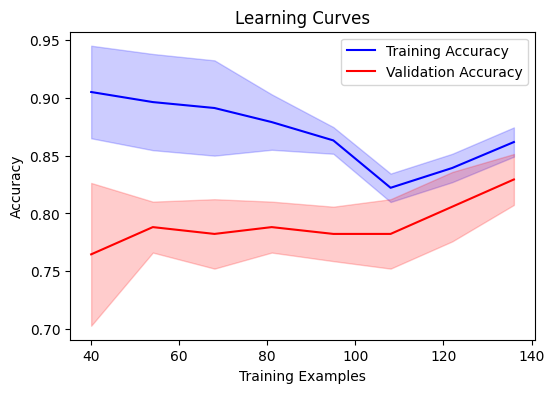



RF shows no significant overfitting.
XGB shows no significant overfitting.
KNN shows no significant overfitting.
LR shows no significant overfitting.


In [43]:
#RFE

# evaluate each model in turn
train_results = []
validation_results = []
names = []
for name, model in models:
     kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
     cv_results = cross_val_score(model,X_optimal_rfe, y_train_transformed, cv=kfold, scoring='accuracy')
     train_results.append(cv_results)
     names.append(name)
     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
     print(msg)
     #evalutaions on the test set will generate a basis for checking if there is any overfitting models
     model.fit(X_optimal_rfe, y_train_transformed)
     val_acc = model.score(X_val_rfe, y_val)
     validation_results.append(val_acc)
     msg = f"{name}(Validation): {val_acc:.2f} \n"
     print(msg)
     plot_learning_curves(model, X_optimal_rfe, y_train_transformed)

print('\n')
# Compare cross-validation and test accuracies to check for overfitting
for i, name in enumerate(names):
    cv_accuracy = train_results[i].mean()
    val_acc = validation_results[i]
    if cv_accuracy >= val_acc:
        print(f"{name} shows no significant overfitting.")
    elif (cv_accuracy + 0.1) < val_acc :
        print(f"{name} may be overfitting.")
    else:
        print(f"{name} shows no significant overfitting.")

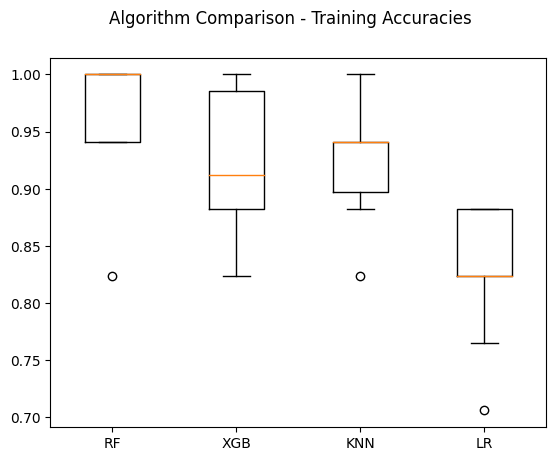

In [44]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison - Training Accuracies')
ax = fig.add_subplot(111)
plt.boxplot(train_results)
ax.set_xticklabels(names)
plt.show()

We pick the Top 3 algorithms in this case based on the highest accuracies and best learning curves achieved. The picked solutions are as follows:
* Random Forest - with ANOVA feature selection
* XGBoost - with ANOVA feature selection
* KNN - with original feature set. 

We do a performance analyses on the top 3 algorithms RF, XGB and KNN using the unseen test dataset by following the steps below.


We now  produce an accuracy score and classification report for the Random Forest Algorithm using the test dataset. 

We get a weighted accuracy score of 92%. This is a relatively good result.  

In [60]:
# Make predictions on validation dataset
random_forest = RandomForestClassifier()
random_forest.fit(X_optimal_anova, y_train_transformed)
random_forest_predictions = random_forest.predict(X_test_anova)

print(accuracy_score(y_test, random_forest_predictions))
print('\n')
print(classification_report(y_test, random_forest_predictions))

0.918918918918919


              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.93      0.96      0.95        28

    accuracy                           0.92        37
   macro avg       0.90      0.87      0.89        37
weighted avg       0.92      0.92      0.92        37



### Hyperparameter Tuning for Random Forest 

In [61]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object
rf_grs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=10)

# Fit the GridSearchCV to your training data
rf_grs.fit(X_optimal_anova, y_train_transformed)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [62]:
print("Best Hyper Parameters:", rf_grs.best_params_)
print("Best estimator:", rf_grs.best_estimator_)

Best Hyper Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best estimator: RandomForestClassifier(random_state=42)


In [65]:
#now we make predictions using the best parameters on the test set. 
best_rf_model = rf_grs.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test_anova)

#we plot the accuracy results by comparing the predictions to true values
print("Accuracy:", metrics.accuracy_score(y_test, best_rf_predictions)) 
print("Precision:", metrics.precision_score(y_test, best_rf_predictions, average = 'weighted'))
print("Recall:", metrics.recall_score(y_test, best_rf_predictions, average = 'weighted')) 
print("F1-score:", metrics.f1_score(y_test, best_rf_predictions, average = 'weighted'))
print('\n')
print(classification_report(y_test, best_rf_predictions))

Accuracy: 0.918918918918919
Precision: 0.9174044734389563
Recall: 0.918918918918919
F1-score: 0.9172454187934065


              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.93      0.96      0.95        28

    accuracy                           0.92        37
   macro avg       0.90      0.87      0.89        37
weighted avg       0.92      0.92      0.92        37



We then plot the confusion matrix to visualize the results further. We see that twice it was wrongly predicted that a patient has PD and once it was wrongly predicted that a patient does not have PD.

Because these results are more accurate and only a minimal level error is involved, it will be preferred over the KNN model. 

Bias (Cost of FN): 5
Variance (Cost of FP): 2


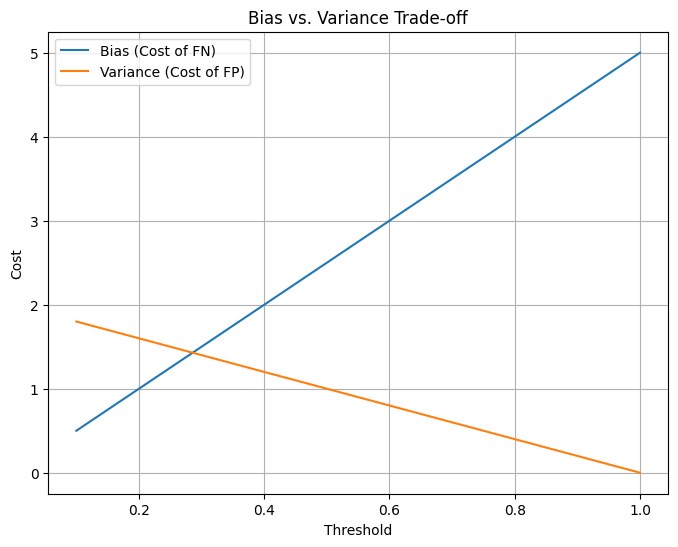

In [107]:
# Calculate bias and variance based on confusion matrix
cm = confusion_matrix(y_test, best_rf_predictions)
false_negatives = cm[1, 0]
false_positives = cm[0, 1]

# Define the cost matrix (adjust these values based on your problem)
cost_matrix = np.array([[0, 1],  # Cost of false positive
                        [5, 0]]) # Cost of false negative

bias = false_negatives * cost_matrix[1, 0]
variance = false_positives * cost_matrix[0, 1]

print(f'Bias (Cost of FN): {bias}')
print(f'Variance (Cost of FP): {variance}')

# Plot bias vs. variance trade-off
thresholds = np.arange(0.1, 1.1, 0.1)

bias_values = [bias * t for t in thresholds]
variance_values = [variance * (1 - t) for t in thresholds]

plt.figure(figsize=(8, 6))
plt.plot(thresholds, bias_values, label='Bias (Cost of FN)')
plt.plot(thresholds, variance_values, label='Variance (Cost of FP)')
plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.legend()
plt.title('Bias vs. Variance Trade-off')
plt.grid()
plt.show()

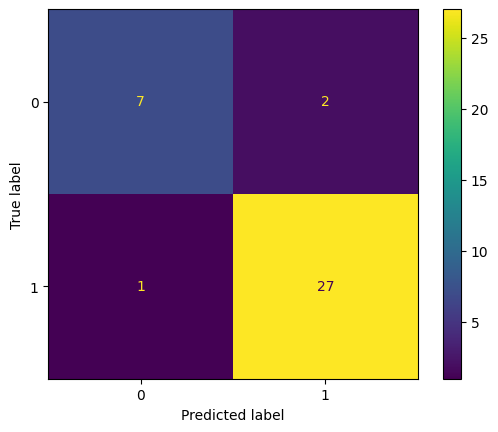

In [66]:
cm = confusion_matrix(y_test, best_rf_predictions)
disp_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_plot.plot()
plt.show()

Next, we generate the results for XGBoost algorithm. We notice that we get exactly the same results as the Decision Tree Classifier. We can ezzpect such results from the XGBoost Classifer as it can be considered an improved newer and faster version of Decision Trees.  

In [84]:
# Make predictions on validation dataset
xgb = XGBClassifier()
xgb.fit(X_optimal_anova, y_train_transformed)
xgb_predictions = xgb.predict(X_test_anova)

print(accuracy_score(y_test, xgb_predictions))
print('\n')
print(classification_report(y_test, xgb_predictions))

0.9459459459459459


              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.96      0.96      0.96        28

    accuracy                           0.95        37
   macro avg       0.93      0.93      0.93        37
weighted avg       0.95      0.95      0.95        37



In [101]:
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create the GridSearchCV object
xgb_grs = GridSearchCV(XGBClassifier(random_state=42), param_grid=param_grid_xgb, cv=10)

# Fit the GridSearchCV to your training data
xgb_grs.fit(X_optimal_anova, y_train_transformed)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]})

In [102]:
print("Best Hyper Parameters:", xgb_grs.best_params_)
print("Best estimator:", xgb_grs.best_estimator_)

Best Hyper Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best estimator: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [103]:
#now we make predictions using the best parameters on the test set. 
best_xgb_model = xgb_grs.best_estimator_
best_xgb_predictions = best_xgb_model.predict(X_test_anova)

#we plot the accuracy results by comparing the predictions to true values
print("Accuracy:", metrics.accuracy_score(y_test, best_xgb_predictions)) 
print("Precision:", metrics.precision_score(y_test, best_xgb_predictions, average = 'weighted'))
print("Recall:", metrics.recall_score(y_test, best_xgb_predictions, average = 'weighted')) 
print("F1-score:", metrics.f1_score(y_test, best_xgb_predictions, average = 'weighted'))
print('\n')
print(classification_report(y_test, best_xgb_predictions))

Accuracy: 0.918918918918919
Precision: 0.9174044734389563
Recall: 0.918918918918919
F1-score: 0.9172454187934065


              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.93      0.96      0.95        28

    accuracy                           0.92        37
   macro avg       0.90      0.87      0.89        37
weighted avg       0.92      0.92      0.92        37



We further analyze the algorithm by plotting the confusion matrix.

Even for the confusion matrix we get a replica of results obtained from the Decision Tree Classifier. 
So we can interpret that both Decision Trees and XGBoost Classifiers have same level of performance on the test dataset.

Bias (Cost of FN): 5
Variance (Cost of FP): 1


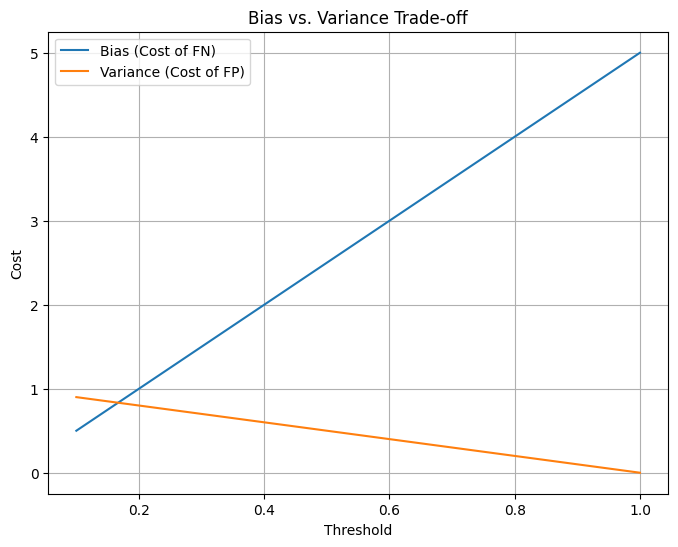

In [105]:
# Calculate bias and variance based on confusion matrix
cm = confusion_matrix(y_test, xgb_predictions)
false_negatives = cm[1, 0]
false_positives = cm[0, 1]

# Define the cost matrix (adjust these values based on your problem)
cost_matrix = np.array([[0, 1],  # Cost of false positive
                        [5, 0]]) # Cost of false negative

bias = false_negatives * cost_matrix[1, 0]
variance = false_positives * cost_matrix[0, 1]

print(f'Bias (Cost of FN): {bias}')
print(f'Variance (Cost of FP): {variance}')

# Plot bias vs. variance trade-off
thresholds = np.arange(0.1, 1.1, 0.1)

bias_values = [bias * t for t in thresholds]
variance_values = [variance * (1 - t) for t in thresholds]

plt.figure(figsize=(8, 6))
plt.plot(thresholds, bias_values, label='Bias (Cost of FN)')
plt.plot(thresholds, variance_values, label='Variance (Cost of FP)')
plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.legend()
plt.title('Bias vs. Variance Trade-off')
plt.grid()
plt.show()

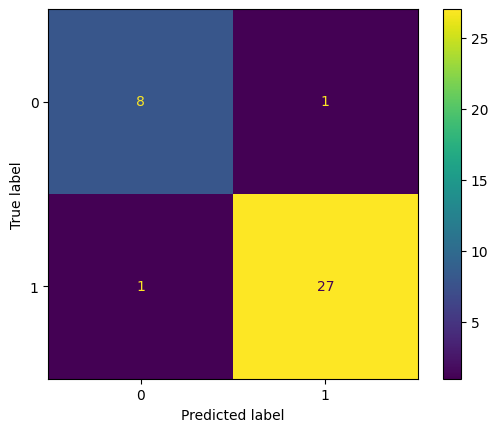

In [104]:
cm = confusion_matrix(y_test, xgb_predictions)
disp_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_plot.plot()
plt.show()

Now we generate the accuracy score and classification report for the KNN algorithm. We notice that the accuracy dropped significantly when the test dataset was used for predictions. We get an overall 90% weighted accuracy for KNN as noted in the classification report.

In [95]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_optimal_anova, y_train_transformed)
knn_predictions = knn.predict(X_test_anova)

print(accuracy_score(y_test, knn_predictions))
print('\n')
print(classification_report(y_test, knn_predictions))

0.8918918918918919


              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.96      0.89      0.93        28

    accuracy                           0.89        37
   macro avg       0.84      0.89      0.86        37
weighted avg       0.90      0.89      0.90        37



In [98]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting of neighbors
    'p': [1, 2],  # Power parameter for Minkowski distance
}

# Create the GridSearchCV object
knn_grs = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=10)

# Fit the GridSearchCV to your training data
knn_grs.fit(X_optimal_anova, y_train_transformed)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [99]:
print("Best Hyper Parameters:", knn_grs.best_params_)
print("Best estimator:", knn_grs.best_estimator_)

Best Hyper Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best estimator: KNeighborsClassifier(n_neighbors=7, p=1)


In [100]:
#now we make predictions using the best parameters on the test set. 
best_knn_model = knn_grs.best_estimator_
best_knn_predictions = best_knn_model.predict(X_test_anova)

#we plot the accuracy results by comparing the predictions to true values
print("Accuracy:", metrics.accuracy_score(y_test, best_knn_predictions)) 
print("Precision:", metrics.precision_score(y_test, best_knn_predictions, average = 'weighted'))
print("Recall:", metrics.recall_score(y_test, best_knn_predictions, average = 'weighted')) 
print("F1-score:", metrics.f1_score(y_test, best_knn_predictions, average = 'weighted'))
print('\n')
print(classification_report(y_test, best_knn_predictions))

Accuracy: 0.8648648648648649
Precision: 0.8886486486486486
Recall: 0.8648648648648649
F1-score: 0.8706927952210971


              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.96      0.86      0.91        28

    accuracy                           0.86        37
   macro avg       0.81      0.87      0.83        37
weighted avg       0.89      0.86      0.87        37



We then plot the confusion matrix for the KNN and interpret that over 5 times the KNN wrongly predicted that patients don't have PD(0) when they were actually suffering from PD(1) and 0 times it wrongly predicted the opposite that a patient has PD when they didn't. 

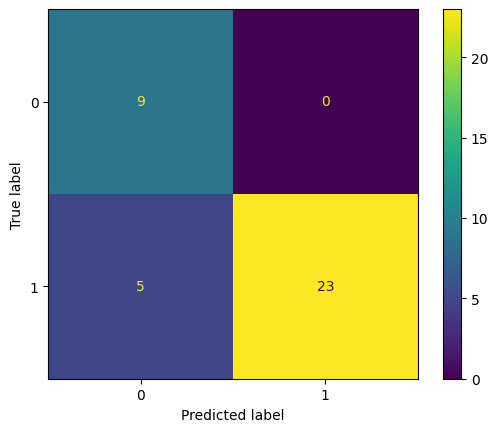

In [ ]:
cm = confusion_matrix(y_test, knn_predictions)
disp_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_plot.plot()
plt.show()

So now when making a final choice for the model selection problem. The XGBoost classifier performed better than the Random Forest classifier on seen training data and test data. So we choose XGBoost as the final choice because: 
- Highest accuracy value - over 95%. 
- Its performance is the most fitting when all things are considered for the supervised machine learning problem of classifying parkinsons disease. 

## Final Presentation of Results

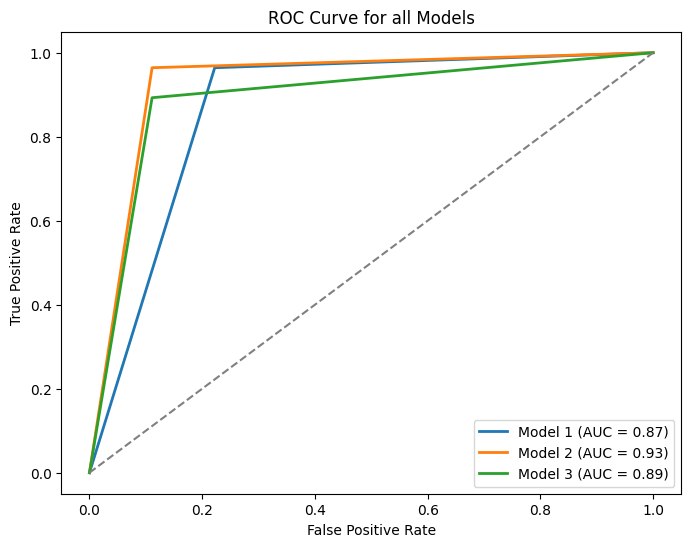

Model 1 ROC AUC Score: 0.87
Model 2 ROC AUC Score: 0.93
Model 3 ROC AUC Score: 0.89


In [121]:
models = [best_rf_model, xgb, knn]  # Replace with your actual models
predictions = [best_rf_predictions, xgb_predictions, knn_predictions]  # Replace with your actual predictions

# Create a list to store the ROC AUC scores for each model
roc_auc_scores = []

# Set up the plot
plt.figure(figsize=(8, 6))
# Plot the ROC curves for each model
for i, model in enumerate(models):
    fpr, tpr, _ = roc_curve(y_test, predictions[i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)

    # Plot the ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'Model {i+1} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all Models')

# Add a legend
plt.legend(loc='lower right')

# Show the plot
plt.show()

# Display the ROC AUC scores for each model
for i, score in enumerate(roc_auc_scores):
    print(f'Model {i+1} ROC AUC Score: {score:.2f}')

In the above Diagram Model 1 is Random Forest, Model 2 is XGB Classifier, and Model 3 is KNN classifier.

In [124]:
# Make predictions on validation dataset
xgb = XGBClassifier()
xgb.fit(X_optimal_anova, y_train_transformed)
xgb_predictions = xgb.predict(X_test_anova)

print(accuracy_score(y_test, xgb_predictions))
print('\n')
print(classification_report(y_test, xgb_predictions))

0.9459459459459459


              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.96      0.96      0.96        28

    accuracy                           0.95        37
   macro avg       0.93      0.93      0.93        37
weighted avg       0.95      0.95      0.95        37



Bias (Cost of FN): 5
Variance (Cost of FP): 1


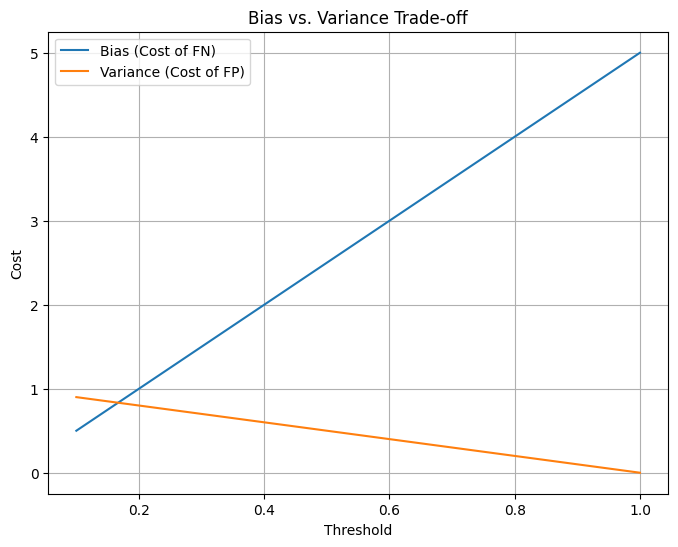

In [ ]:
# Calculate bias and variance based on confusion matrix
cm = confusion_matrix(y_test, xgb_predictions)
false_negatives = cm[1, 0]
false_positives = cm[0, 1]

# Define the cost matrix (adjust these values based on your problem)
cost_matrix = np.array([[0, 1],  # Cost of false positive
                        [5, 0]]) # Cost of false negative

bias = false_negatives * cost_matrix[1, 0]
variance = false_positives * cost_matrix[0, 1]

print(f'Bias (Cost of FN): {bias}')
print(f'Variance (Cost of FP): {variance}')

# Plot bias vs. variance trade-off
thresholds = np.arange(0.1, 1.1, 0.1)

bias_values = [bias * t for t in thresholds]
variance_values = [variance * (1 - t) for t in thresholds]

plt.figure(figsize=(8, 6))
plt.plot(thresholds, bias_values, label='Bias (Cost of FN)')
plt.plot(thresholds, variance_values, label='Variance (Cost of FP)')
plt.xlabel('Threshold')
plt.ylabel('Cost')
plt.legend()
plt.title('Bias vs. Variance Trade-off')
plt.grid()
plt.show()

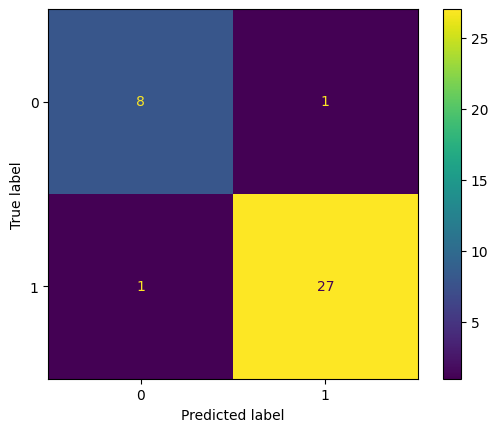

In [ ]:
cm = confusion_matrix(y_test, xgb_predictions)
disp_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_plot.plot()
plt.show()

##### Standalone model on the entire training set

In [145]:
final_standalone_model = XGBClassifier() #No hyperparamter tuning and no feature selected training and no class augmentation. 
#all the data is included here.
final_standalone_model.fit(my_X_train, my_y_train) #using the copy of original df which includes the Entire training set. 


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

* Saving the model for future use

In [146]:
import joblib

# Save the model to a file
model_filename = 'predict_parkinsons.pkl'
joblib.dump(final_standalone_model, model_filename)

['predict_parkinsons.pkl']

* Loading the Data for future use

In [147]:
# Load the saved model
my_model = joblib.load(model_filename)

new_data = my_X_test
# Make predictions using the loaded model
new_predictions = my_model.predict(new_data)

print(new_predictions)
print(classification_report(my_y_test, new_predictions))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1]
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



* Ethical and Privacy concerns will be covered in the report

# References 
Castillo, D 2021, Machine Learning Regression Explained, Seldon, viewed 5 September 2023,
https://www.seldon.io/machine-learning-regression-explained

Shubham, S 2019, Pattern Recognition | Phases and Activities, viewed 5 September 2023,
https://www.geeksforgeeks.org/pattern-recognition-phases-and-activities/

Kolamanvitha 2021, Design Patterns for Machine Learning, https://towardsdatascience.com/design-patterns-
for-machine-learning-410be845c0db

Little, M 2008, UCI Machine Learning Repository, DOI: https://doi.org/10.24432/C59C74

Rustempasic, I & Can, M 2013, ‘Diagnosis of Parkinson’s Disease using Fuzzy C-Means Clustering and Pattern
Recognition’, Southeast Europe Journal of Soft Computing, vol. 2, no. 1.

National Institute on Aging 2022, ‘Parkinson’s Disease: Causes, Symptoms, and Treatments’. Available at:
<https://www.nia.nih.gov/health/parkinsons-
disease#:~:text=The%20main%20therapy%20for%20Parkinson's,with%20another%20medication%20called%2
0carbidopa.>

Identifying male or female based on voice using XGBoost and ML (2022) TechieYan Technologies. Available at: https://techieyantechnologies.com/identifying-male-or-female-based-on-voice-using-xgboost-and-ml/ (Accessed: 03 November 2023). 

Thiruvengatanadhan, R 2017, ‘Speech/Music Classification using MFCC and KNN’, International Journal of Computational Intelligence Research, vol. 13, no. 10, pp. 2449–2452.